In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn scikit-learn


In [ ]:
!pip install openpyxl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [ ]:
df=pd.read_excel('/content/NBFC Loan Transaction Data.xlsx')

In [ ]:
df.shape

(20012, 53)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['CITY', 'PRODUCT', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH'], dtype='object')


In [ ]:
df.isnull().sum()

,0
AGREEMENTID,0
AUTHORIZATIONDATE,0
BALANCE_EXCESS,0
BALANCE_TENURE,0
CITY,0
COMPLETED_TENURE,0
CURRENT_INTEREST_RATE,0
CURRENT_INTEREST_RATE_MAX,0
CURRENT_INTEREST_RATE_MIN,0
CURRENT_INTEREST_RATE_CHANGES,0


In [ ]:
#Removing Columns
df=df.drop(['CUSTOMERID','DIFF_EMI_AMOUNT_MAX_MIN','LAST_RECEIPT_AMOUNT','LAST_RECEIPT_DATE',
            'MAX_EMI_AMOUNT','MIN_EMI_AMOUNT','SCHEMEID','NPA_IN_LAST_MONTH',
           'NPA_IN_CURRENT_MONTH','MOB'],axis=1)

In [ ]:
# Keeping Latest Transaction Month as this is Month of last receipt date
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
AGREEMENTID,0
AUTHORIZATIONDATE,0
BALANCE_EXCESS,0
BALANCE_TENURE,0
CITY,0
COMPLETED_TENURE,0
CURRENT_INTEREST_RATE,0
CURRENT_INTEREST_RATE_MAX,0
CURRENT_INTEREST_RATE_MIN,0
CURRENT_INTEREST_RATE_CHANGES,0


In [ ]:
df.head()

,AGREEMENTID,AUTHORIZATIONDATE,BALANCE_EXCESS,BALANCE_TENURE,CITY,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,...,ORIGNAL_INTEREST_RATE,ORIGNAL_TENOR,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,PRODUCT,FORECLOSURE
0,11220001,2010-08-29,0.0,0,MUMBAI,45,13.421934,13.734072,13.421934,1,...,10.612692,120,1.164472e+05,2.725723e+06,1.159366e+07,7994.273589,0.0,7994.273589,HL,1
1,11220002,2010-09-15,0.0,99,MUMBAI,38,13.734072,13.734072,13.734072,0,...,10.612692,180,1.234760e+07,4.945154e+06,6.942656e+06,100504.575864,0.0,100504.575864,HL,1
2,11220006,2010-11-02,0.0,231,MUMBAI,81,15.606900,16.231176,15.606900,2,...,11.549106,180,2.994184e+06,2.990124e+06,9.392115e+05,5947.630536,0.0,5947.630536,HL,1
3,11220008,2010-10-06,0.0,0,THANE,91,11.236968,13.734072,11.236968,4,...,10.612692,180,4.295120e+04,4.648994e+06,9.979637e+06,60322.180776,0.0,60322.180776,HL,1
4,11220010,2010-10-26,0.0,215,MUMBAI,89,14.982624,15.606900,14.982624,2,...,10.924830,180,7.200653e+06,6.593778e+06,5.552847e+05,27732.787464,0.0,27732.787464,HL,1


In [ ]:
#One value in FOIR columns is around 15000, hence we drop that row
df=df[df['FOIR']<34]

In [ ]:
df['FORECLOSURE'].value_counts()

,count
FORECLOSURE,
0,18141
1,1795


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
AGREEMENTID,19936.0,11236623.794141,11220001.0,11228300.25,11236583.5,11244947.25,11253354.0,9626.220011
AUTHORIZATIONDATE,19936,2016-12-17 16:25:26.966292480,2010-08-29 00:00:00,2015-12-31 00:00:00,2017-08-31 00:00:00,2018-04-25 00:00:00,2018-12-31 00:00:00,NaN
BALANCE_EXCESS,19936.0,79297.128072,0.0,0.0,0.0,61.89467,75555999.4788,1351195.805439
BALANCE_TENURE,19936.0,172.843951,0.0,136.0,174.0,216.0,674.0,64.064533
COMPLETED_TENURE,19936.0,17.334571,0.0,6.0,12.0,25.0,98.0,16.483387
CURRENT_INTEREST_RATE,19936.0,14.78673,9.901017,12.797658,14.545631,16.231176,25.095895,2.486746
CURRENT_INTEREST_RATE_MAX,19936.0,14.905498,10.425409,13.109796,14.670486,16.543314,37.45656,2.480656
CURRENT_INTEREST_RATE_MIN,19936.0,14.304842,-5.056636,12.423092,13.734072,16.168748,24.034626,2.679239
CURRENT_INTEREST_RATE_CHANGES,19936.0,0.760985,0.0,0.0,0.0,2.0,9.0,1.135515
CURRENT_TENOR,19936.0,190.178521,6.0,166.0,180.0,228.0,713.0,58.589216


<Axes: xlabel='CURRENT_TENOR', ylabel='Density'>

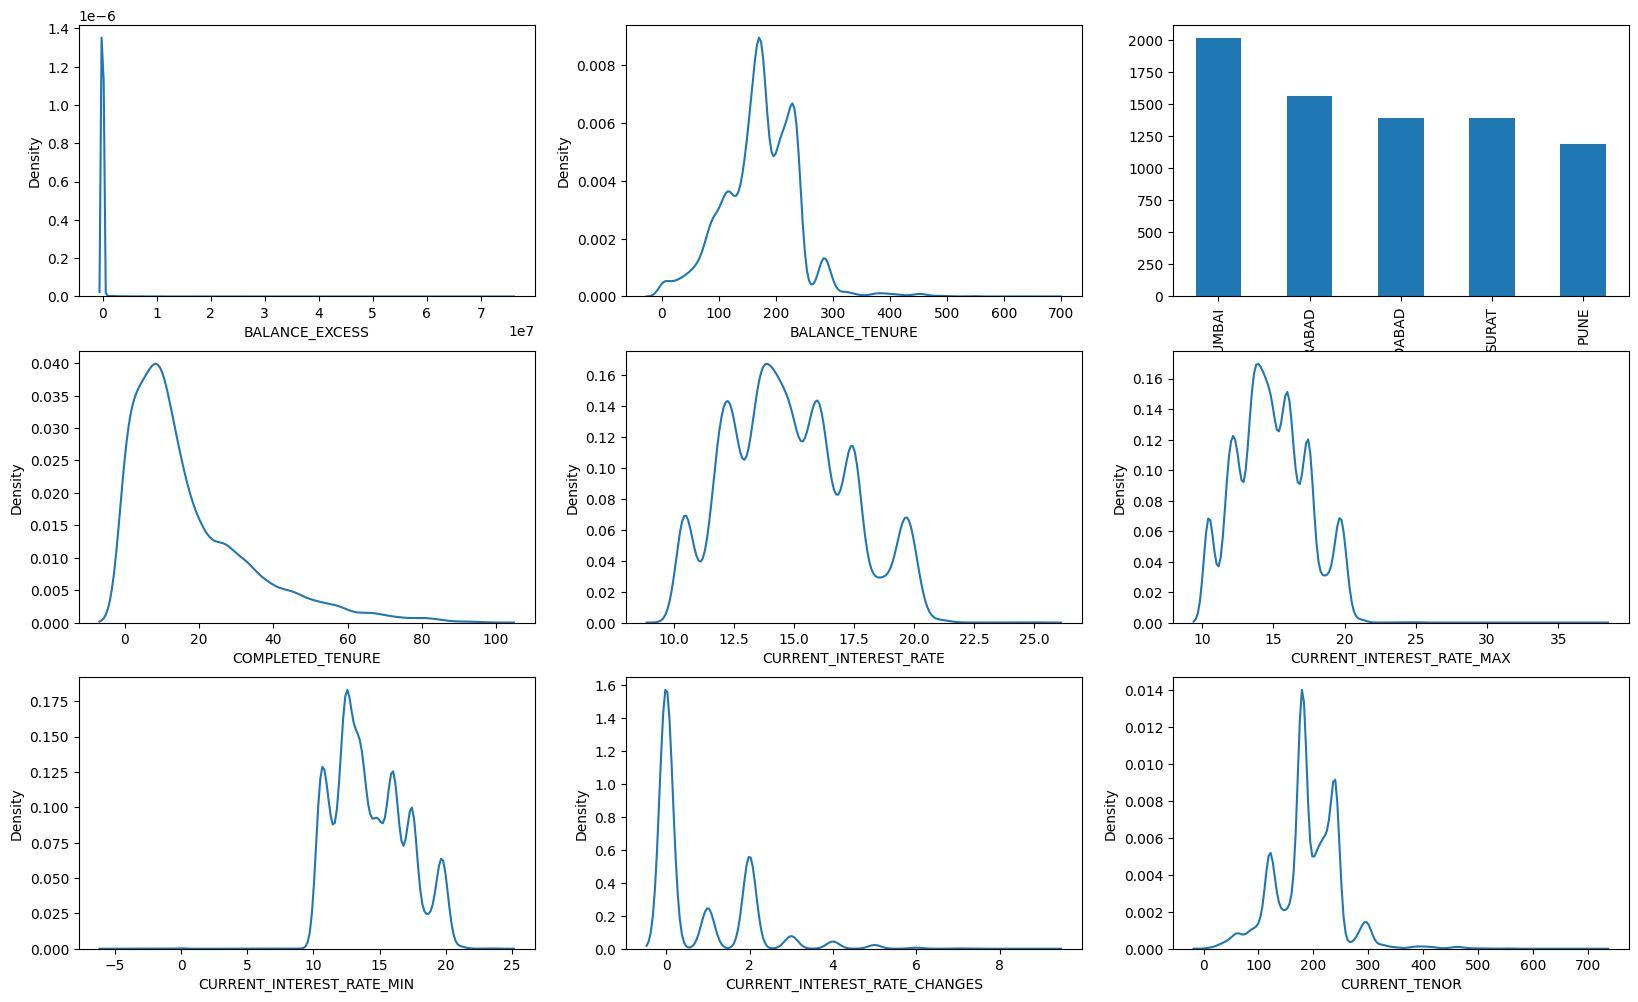

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.kdeplot(df['BALANCE_EXCESS'])
plt.subplot(3,3,2)
sns.kdeplot(df['BALANCE_TENURE'])
plt.subplot(3,3,3)
df['CITY'].value_counts().head(5).plot(kind='bar')
plt.subplot(3,3,4)
sns.kdeplot(df['COMPLETED_TENURE'])
plt.subplot(3,3,5)
sns.kdeplot(df['CURRENT_INTEREST_RATE'])
plt.subplot(3,3,6)
sns.kdeplot(df['CURRENT_INTEREST_RATE_MAX'])
plt.subplot(3,3,7)
sns.kdeplot(df['CURRENT_INTEREST_RATE_MIN'])
plt.subplot(3,3,8)
sns.kdeplot(df['CURRENT_INTEREST_RATE_CHANGES'])
plt.subplot(3,3,9)
sns.kdeplot(df['CURRENT_TENOR'])

/tmp/ipython-input-3020006545.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DPD'])
/tmp/ipython-input-3020006545.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DUEDAY'])
/tmp/ipython-input-3020006545.py:17: UserWarning: 

`distplot` is a deprecated function and will be remove

<Axes: xlabel='EMI_RECEIVED_AMT', ylabel='Density'>

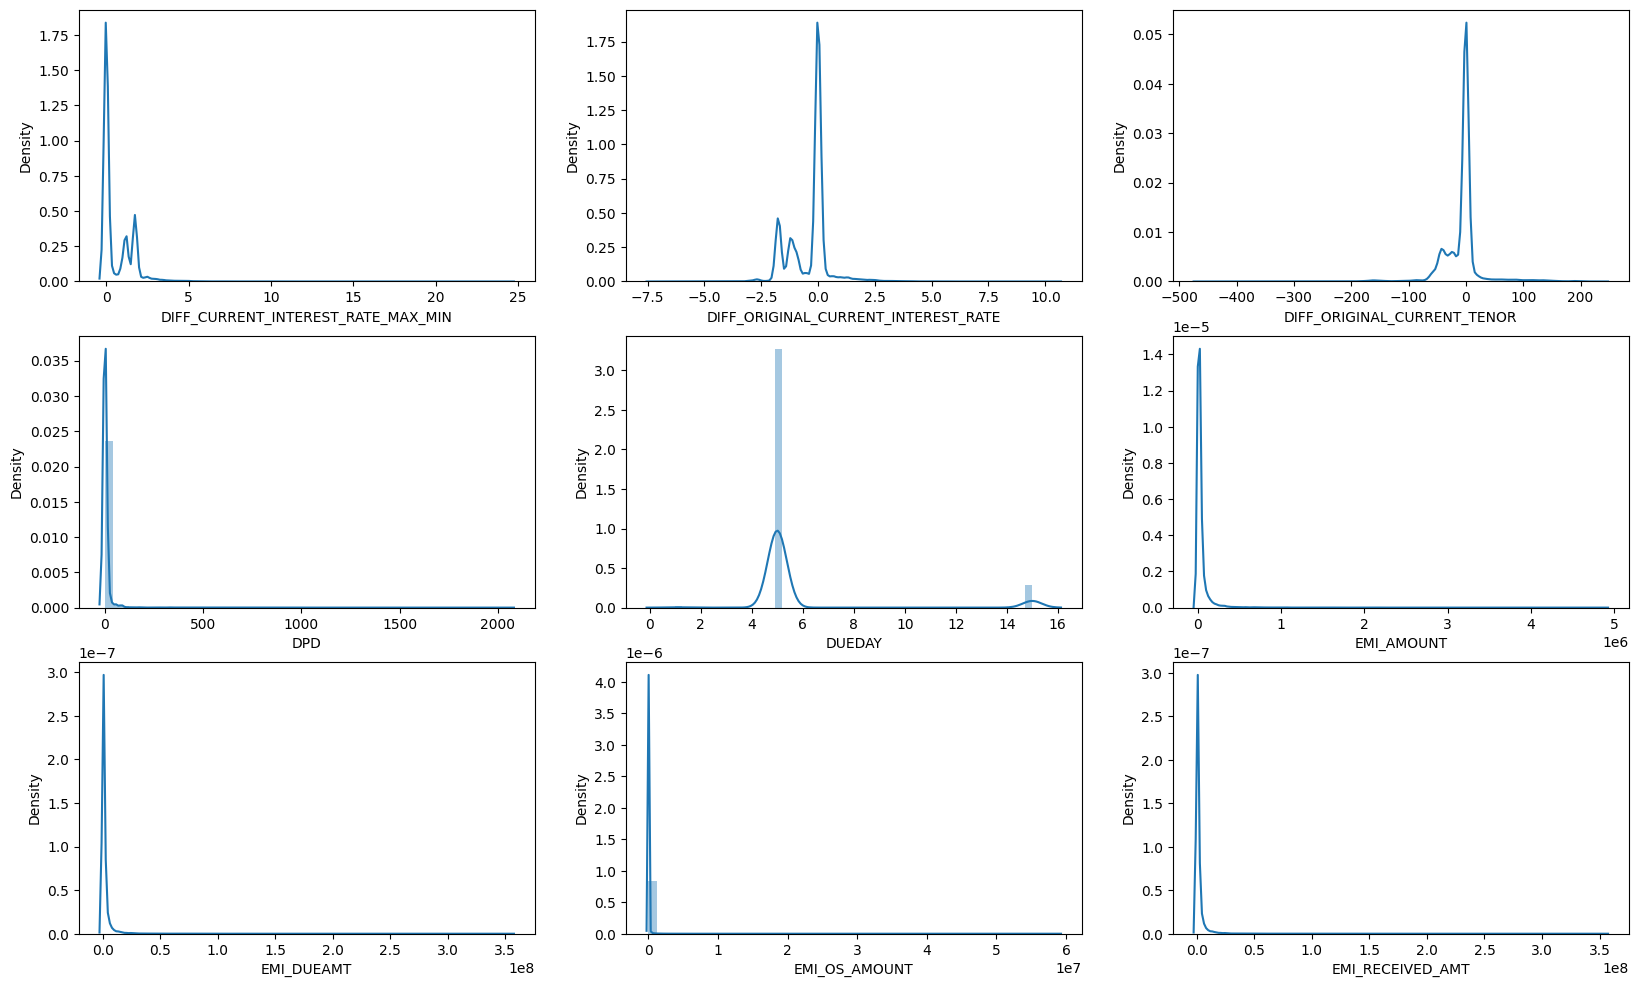

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.kdeplot(df['DIFF_CURRENT_INTEREST_RATE_MAX_MIN'])
plt.subplot(3,3,2)
sns.kdeplot(df['DIFF_ORIGINAL_CURRENT_INTEREST_RATE'])
plt.subplot(3,3,3)
sns.kdeplot(df['DIFF_ORIGINAL_CURRENT_TENOR'])
plt.subplot(3,3,4)
sns.distplot(df['DPD'])
plt.subplot(3,3,5)
sns.distplot(df['DUEDAY'])
plt.subplot(3,3,6)
sns.kdeplot(df['EMI_AMOUNT'])
plt.subplot(3,3,7)
sns.kdeplot(df['EMI_DUEAMT'])
plt.subplot(3,3,8)
sns.distplot(df['EMI_OS_AMOUNT'])
plt.subplot(3,3,9)
sns.kdeplot(df['EMI_RECEIVED_AMT'])

<Axes: xlabel='NUM_EMI_CHANGES', ylabel='Density'>

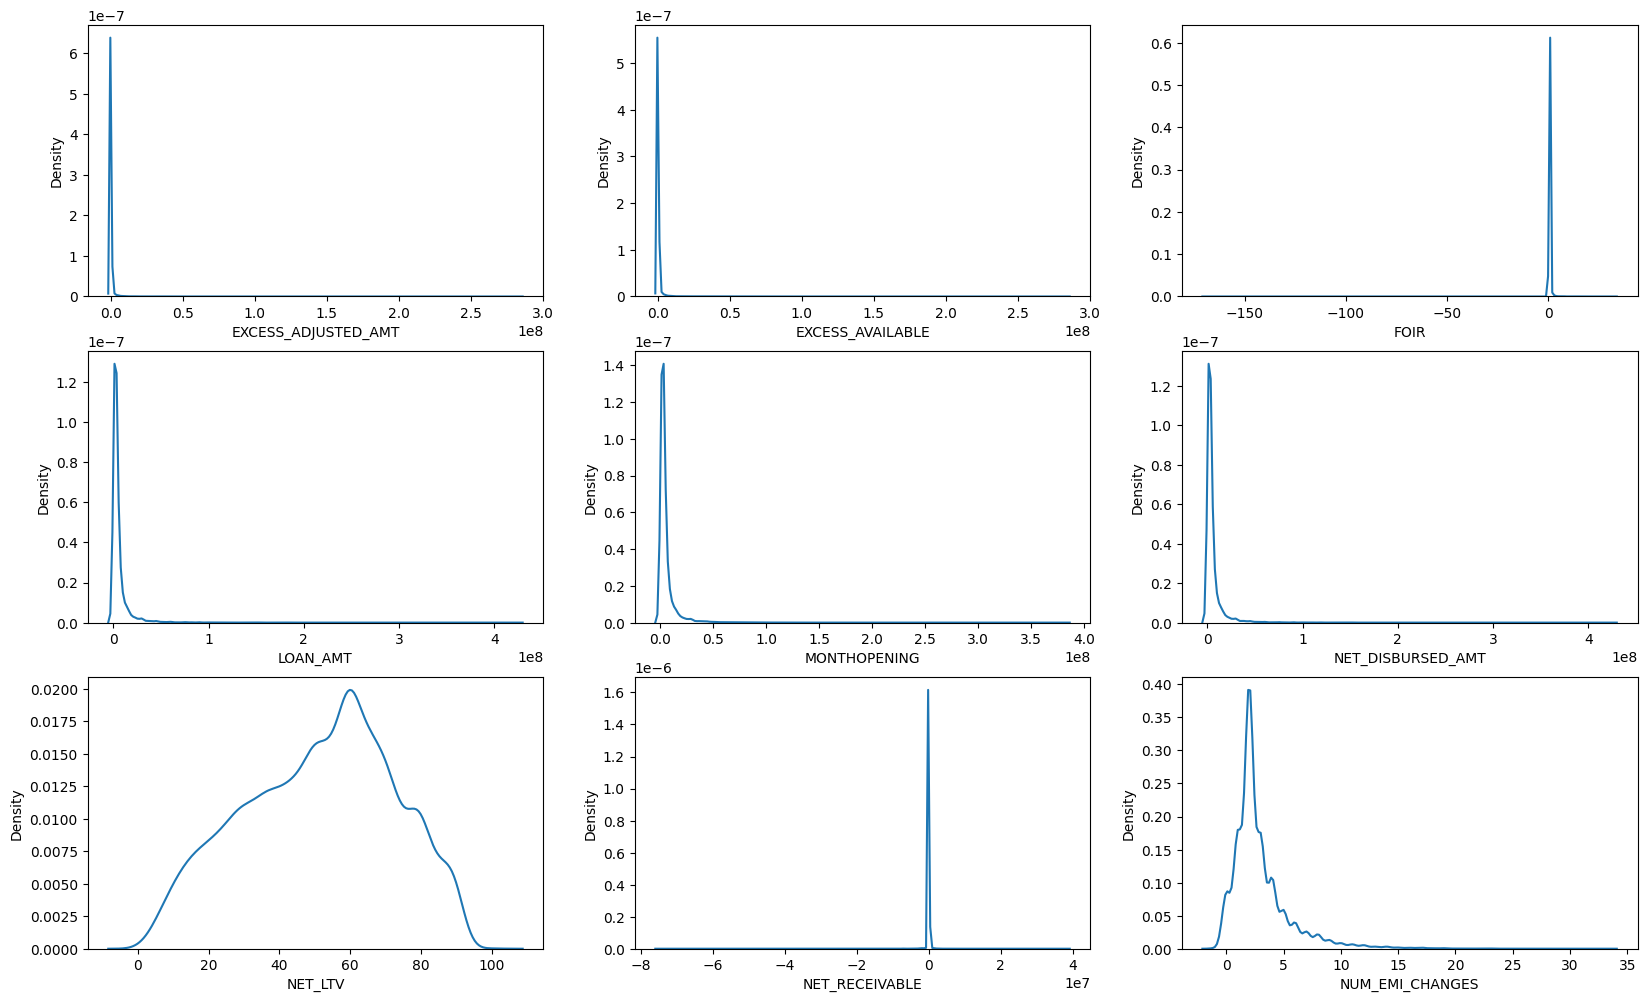

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.kdeplot(df['EXCESS_ADJUSTED_AMT'])
plt.subplot(3,3,2)
sns.kdeplot(df['EXCESS_AVAILABLE'])
plt.subplot(3,3,3)
sns.kdeplot(df['FOIR'])
plt.subplot(3,3,4)
sns.kdeplot(df['LOAN_AMT'])
plt.subplot(3,3,5)
sns.kdeplot(df['MONTHOPENING'])
plt.subplot(3,3,6)
sns.kdeplot(df['NET_DISBURSED_AMT'])
plt.subplot(3,3,7)
sns.kdeplot(df['NET_LTV'])
plt.subplot(3,3,8)
sns.kdeplot(df['NET_RECEIVABLE'])
plt.subplot(3,3,9)
sns.kdeplot(df['NUM_EMI_CHANGES'])

/tmp/ipython-input-3320806828.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRE_EMI_OS_AMOUNT'])


<Axes: xlabel='PRE_EMI_RECEIVED_AMT', ylabel='Density'>

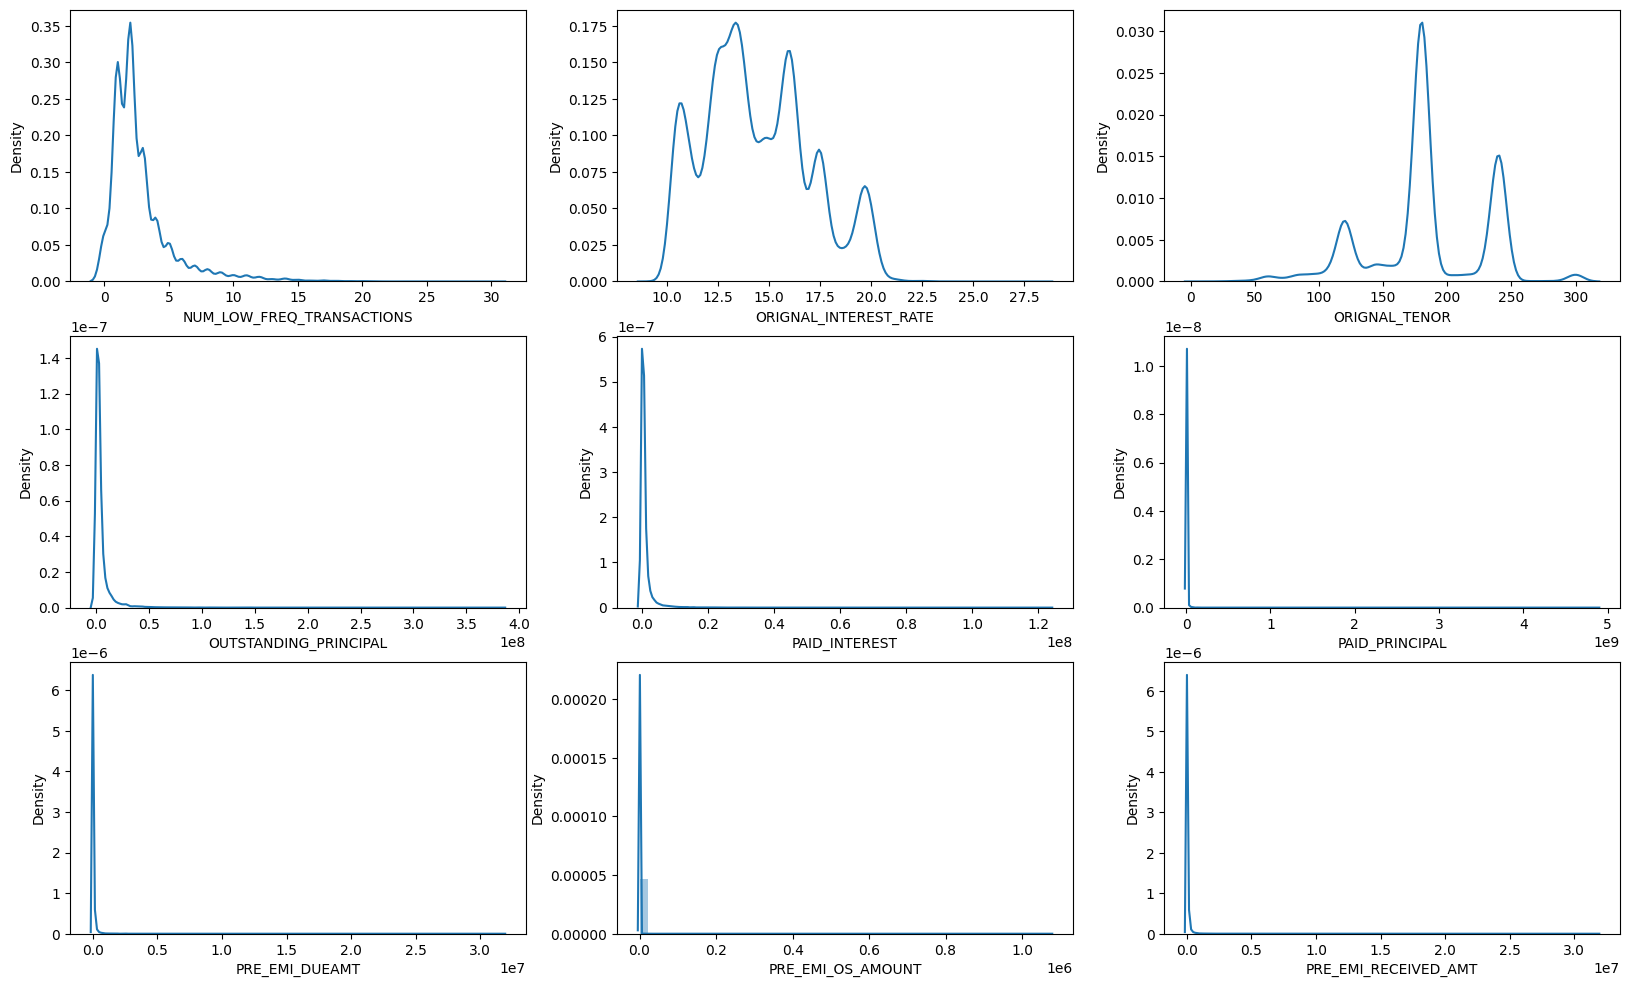

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.kdeplot(df['NUM_LOW_FREQ_TRANSACTIONS'])
plt.subplot(3,3,2)
sns.kdeplot(df['ORIGNAL_INTEREST_RATE'])
plt.subplot(3,3,3)
sns.kdeplot(df['ORIGNAL_TENOR'])
plt.subplot(3,3,4)
sns.kdeplot(df['OUTSTANDING_PRINCIPAL'])
plt.subplot(3,3,5)
sns.kdeplot(df['PAID_INTEREST'])
plt.subplot(3,3,6)
sns.kdeplot(df['PAID_PRINCIPAL'])
plt.subplot(3,3,7)
sns.kdeplot(df['PRE_EMI_DUEAMT'])
plt.subplot(3,3,8)
sns.distplot(df['PRE_EMI_OS_AMOUNT'])
plt.subplot(3,3,9)
sns.kdeplot(df['PRE_EMI_RECEIVED_AMT'])

<Axes: xlabel='count', ylabel='PRODUCT'>

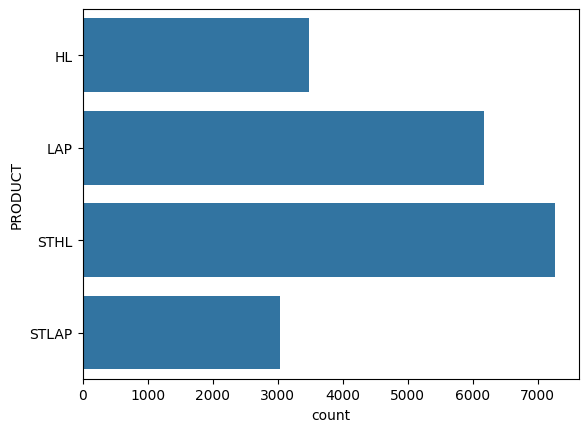

In [ ]:
sns.countplot(df['PRODUCT'])

<Axes: ylabel='count'>

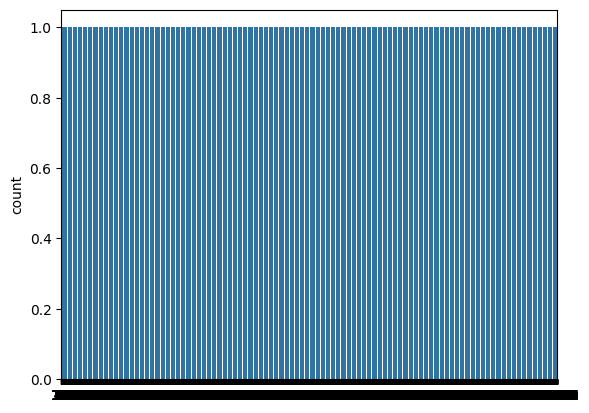

In [ ]:
sns.countplot(df['FORECLOSURE'])

<Axes: xlabel='AUTHORIZATIONDATE'>

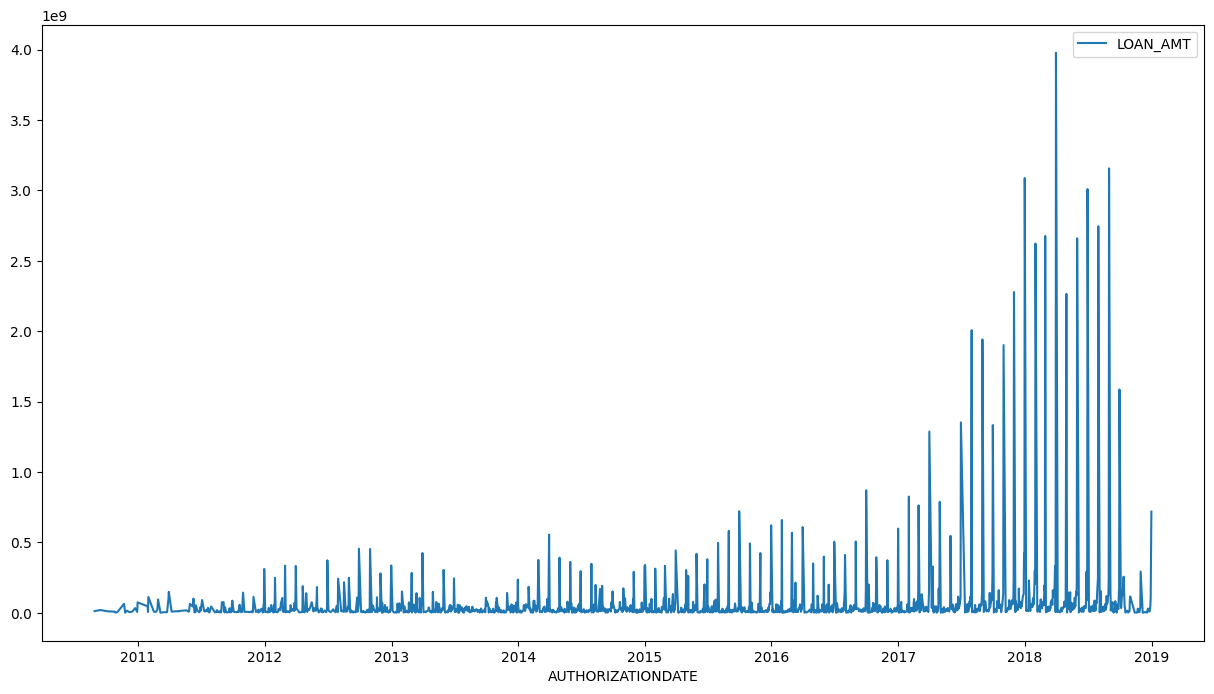

In [ ]:
df['AUTHORIZATIONDATE']=df['AUTHORIZATIONDATE'].dt.date
df.groupby(['AUTHORIZATIONDATE'])[['LOAN_AMT']].sum().plot(figsize=(15,8))

In [ ]:
df.groupby(['CITY'])[['LOAN_AMT']].sum().sort_values(by='LOAN_AMT',ascending=False).head()

,LOAN_AMT
CITY,
MUMBAI,2.620466e+10
PUNE,1.058601e+10
DELHI,1.023889e+10
BANGALORE,8.162923e+09
CHENNAI,7.309639e+09


In [ ]:
df.groupby(['PRODUCT'])[['LOAN_AMT']].sum().sort_values(by='LOAN_AMT',ascending=False).head()

,LOAN_AMT
PRODUCT,
LAP,6.897224e+10
HL,2.648937e+10
STHL,1.588133e+10
STLAP,5.453858e+09


In [ ]:
df['PRODUCT'].value_counts()

,count
PRODUCT,
STHL,7262
LAP,6165
HL,3480
STLAP,3029


In [ ]:
df.groupby(['AGREEMENTID'])[['LOAN_AMT']].sum().sort_values(by='LOAN_AMT',ascending=False).head()

,LOAN_AMT
AGREEMENTID,
11235959,4.245665e+08
11235863,3.918382e+08
11244769,3.308063e+08
11244309,2.808924e+08
11243846,2.492151e+08


<Axes: xlabel='FORECLOSURE', ylabel='DPD'>

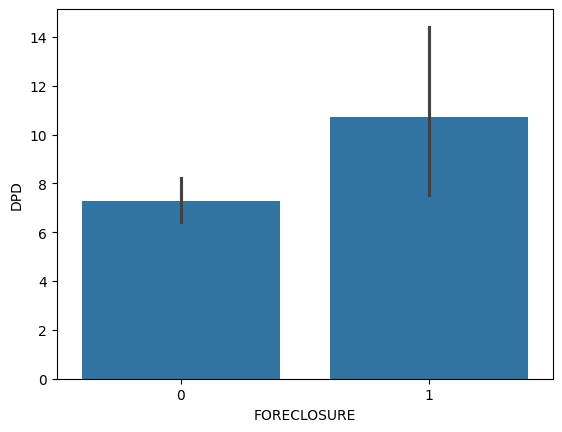

In [ ]:
sns.barplot(x=df['FORECLOSURE'], y=df['DPD'])


<Axes: xlabel='FORECLOSURE', ylabel='DUEDAY'>

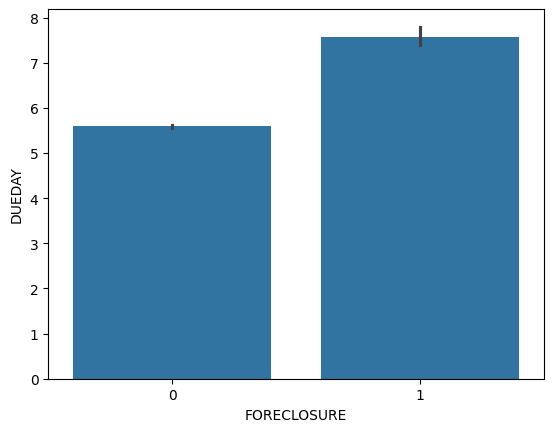

In [ ]:
sns.barplot(x=df['FORECLOSURE'],y=df['DUEDAY'])

<Axes: xlabel='FORECLOSURE', ylabel='LOAN_AMT'>

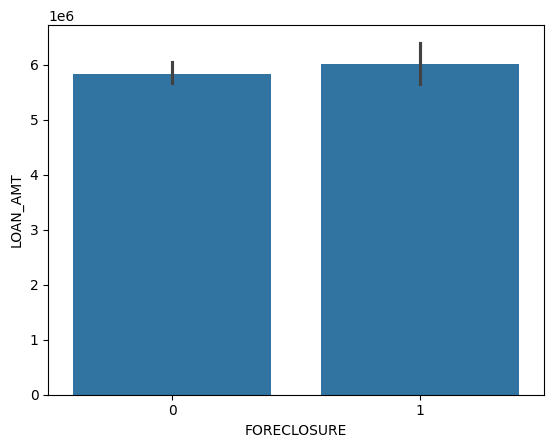

In [ ]:
sns.barplot(x=df['FORECLOSURE'],y=df['LOAN_AMT'])

<Axes: xlabel='FORECLOSURE', ylabel='OUTSTANDING_PRINCIPAL'>

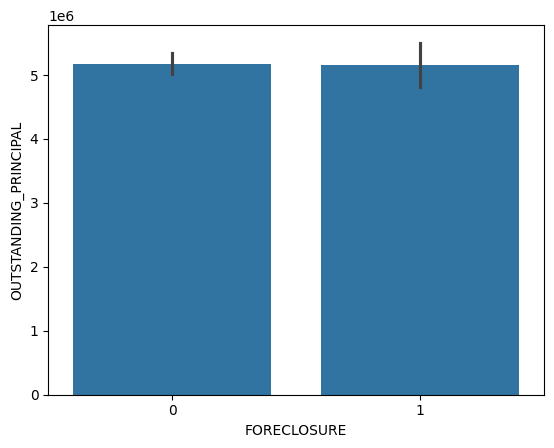

In [ ]:
sns.barplot(x=df['FORECLOSURE'],y=df['OUTSTANDING_PRINCIPAL'])

<Axes: xlabel='FORECLOSURE', ylabel='NUM_LOW_FREQ_TRANSACTIONS'>

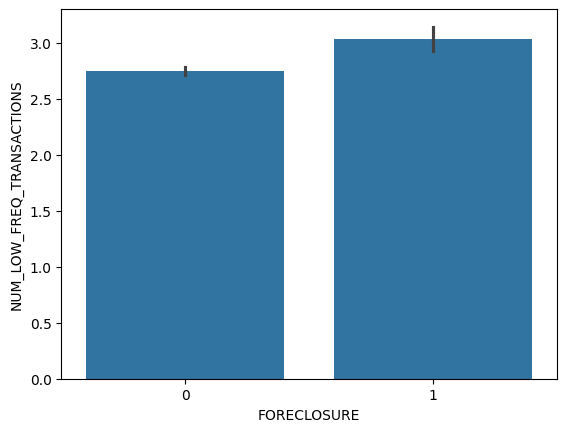

In [ ]:
sns.barplot(x=df['FORECLOSURE'],y=df['NUM_LOW_FREQ_TRANSACTIONS'])

<Axes: xlabel='FORECLOSURE', ylabel='EMI_DUEAMT'>

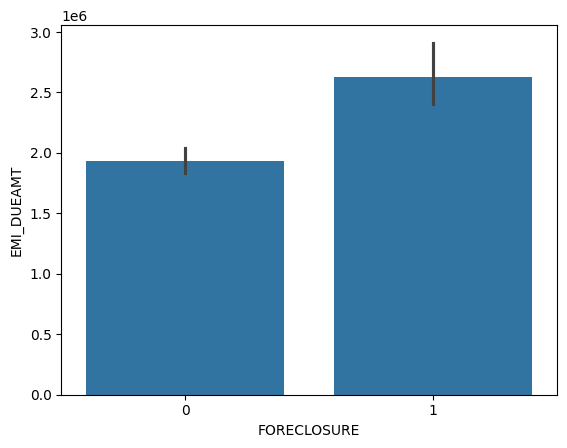

In [ ]:
sns.barplot(x=df['FORECLOSURE'],y=df['EMI_DUEAMT'])

<Axes: xlabel='AUTHORIZATIONDATE'>

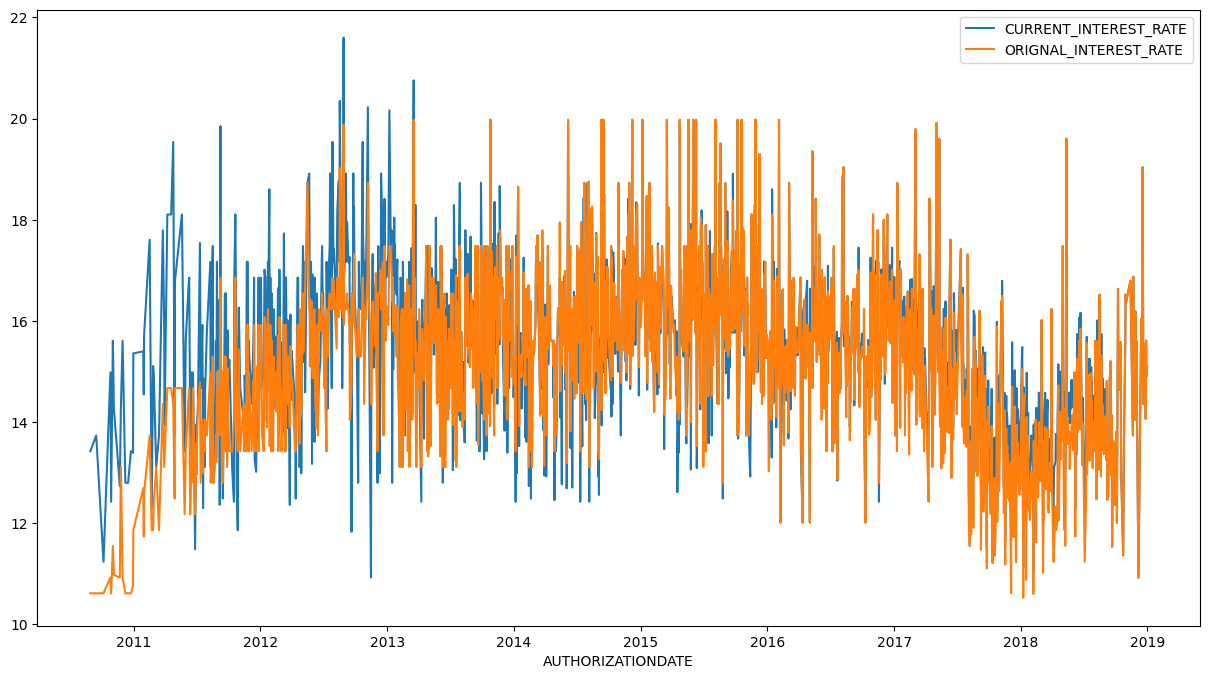

In [ ]:
df.groupby(['AUTHORIZATIONDATE'])[['CURRENT_INTEREST_RATE','ORIGNAL_INTEREST_RATE']].mean().plot(figsize=(15,8))

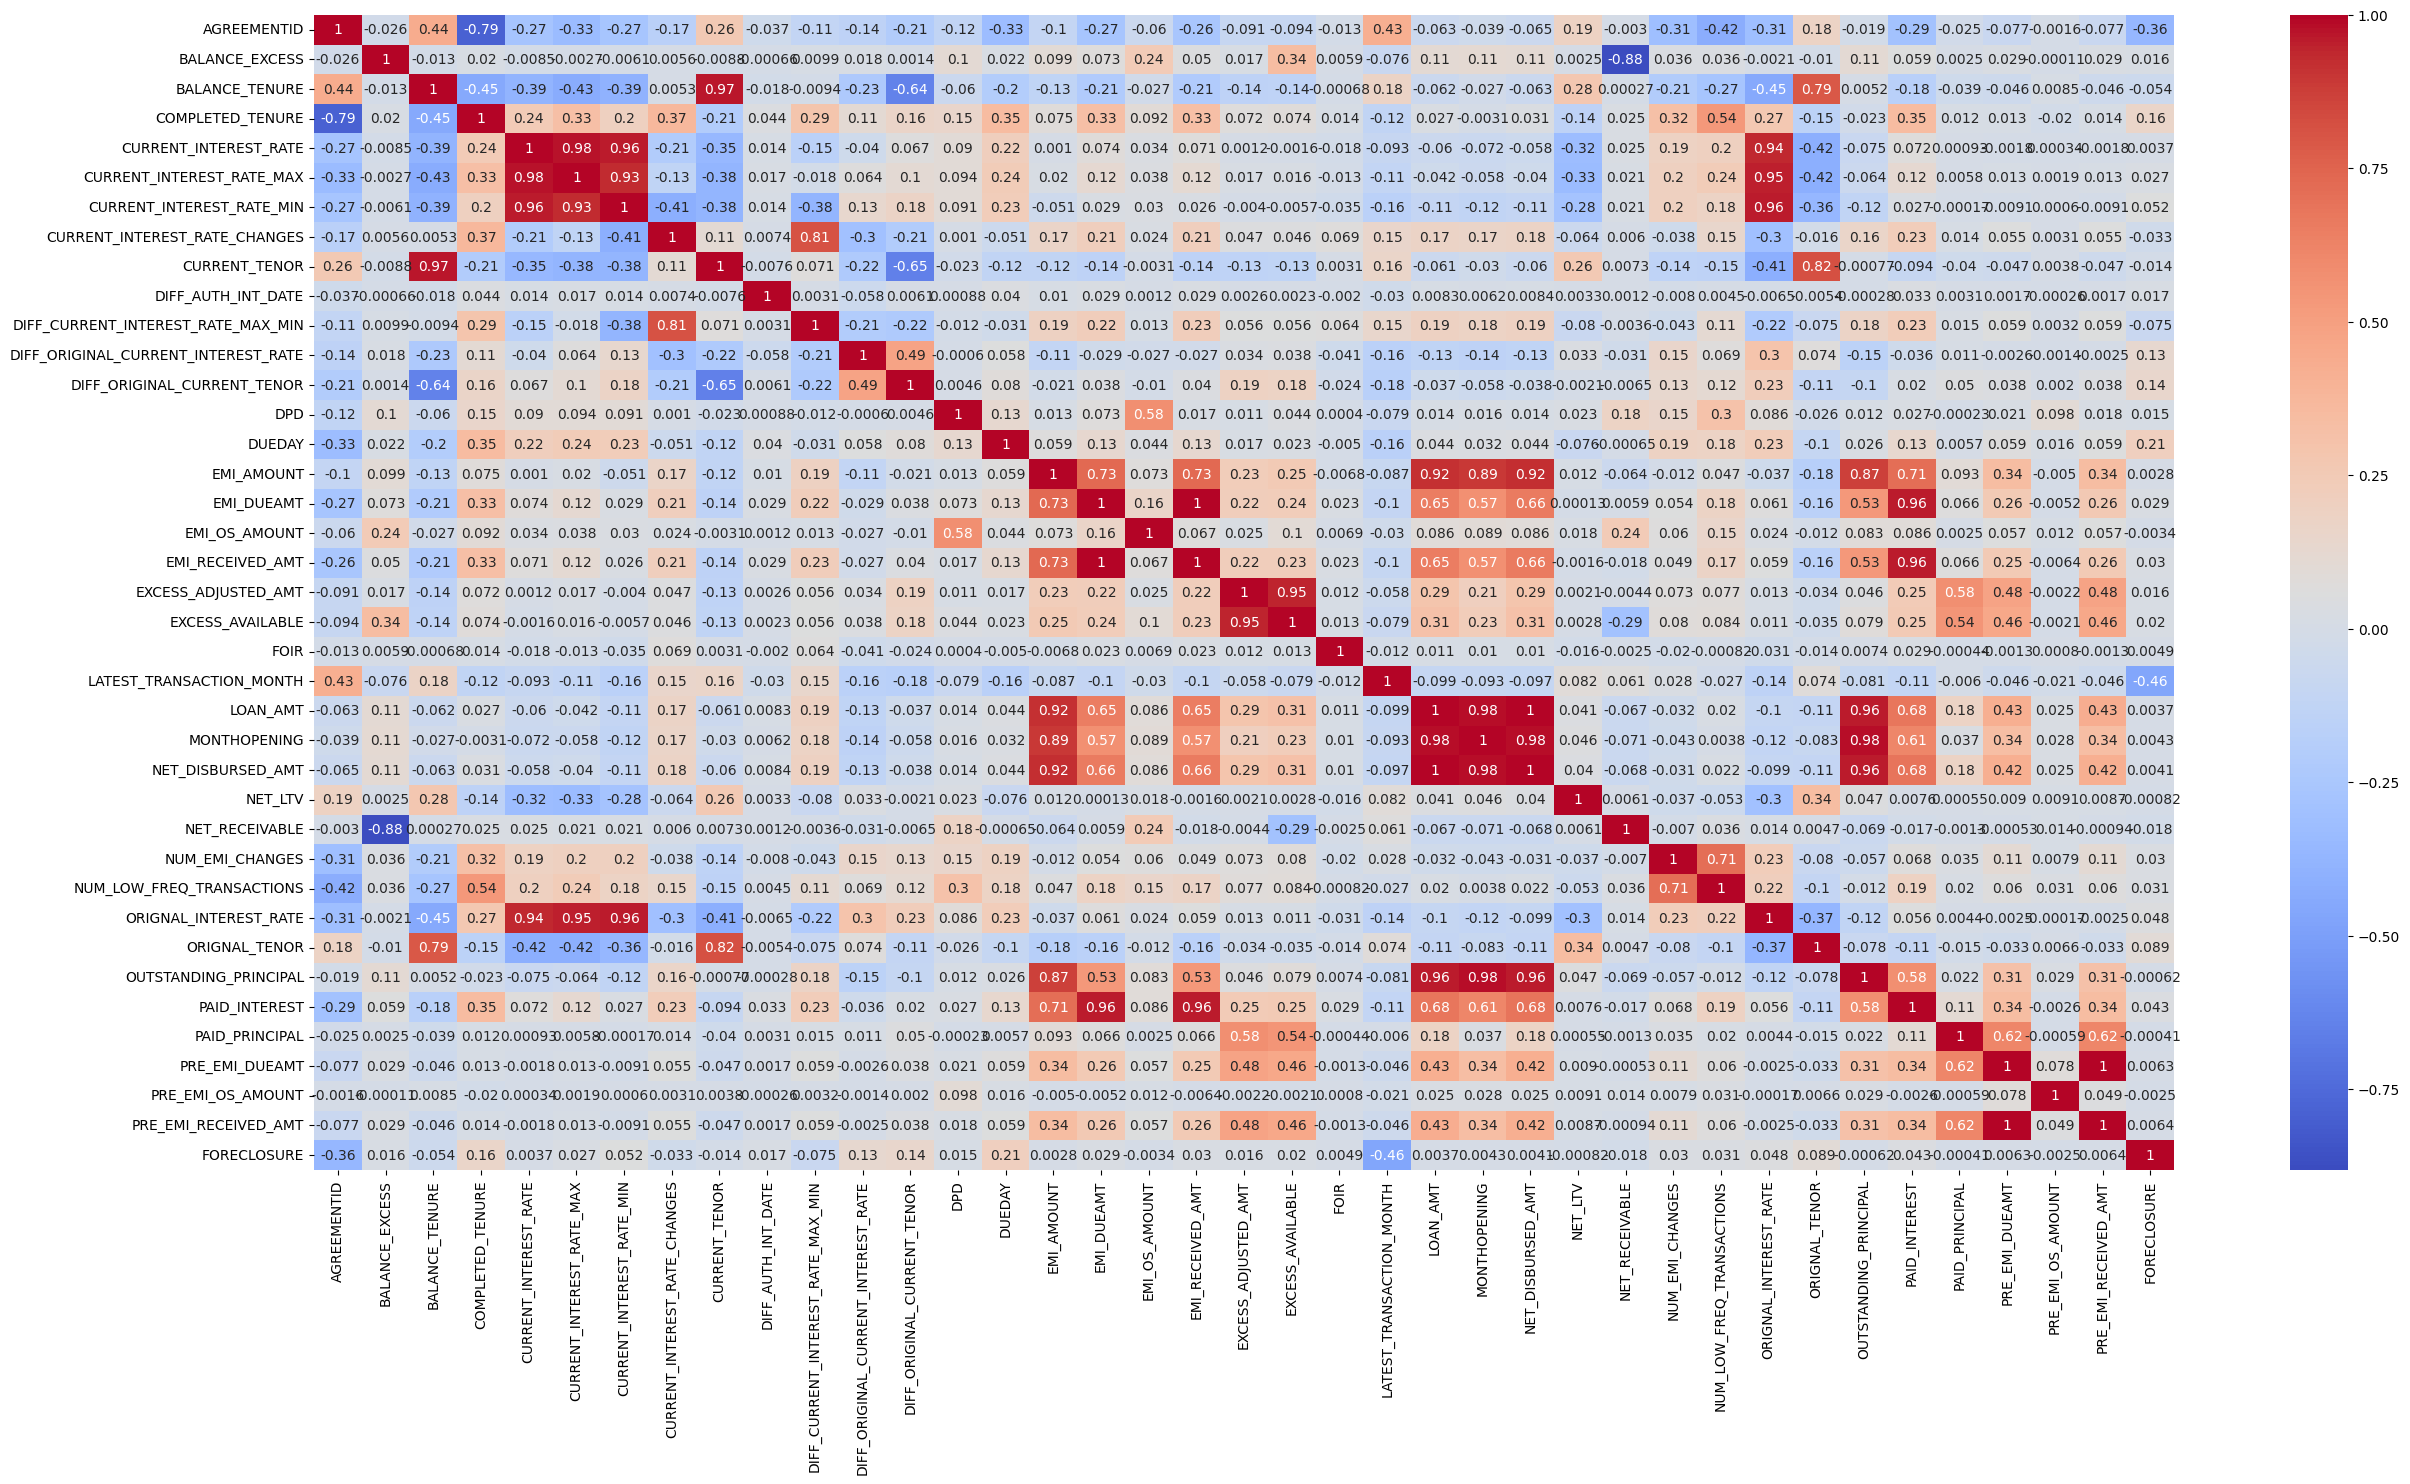

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(30, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()


In [ ]:
df[['PRE_EMI_DUEAMT','PRE_EMI_OS_AMOUNT','PRE_EMI_RECEIVED_AMT']].corr()

,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT
PRE_EMI_DUEAMT,1.000000,0.077645,0.999579
PRE_EMI_OS_AMOUNT,0.077645,1.000000,0.048691
PRE_EMI_RECEIVED_AMT,0.999579,0.048691,1.000000


In [ ]:
df[['LOAN_AMT','OUTSTANDING_PRINCIPAL','PAID_PRINCIPAL']].corr()

,LOAN_AMT,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL
LOAN_AMT,1.000000,0.956292,0.177686
OUTSTANDING_PRINCIPAL,0.956292,1.000000,0.021675
PAID_PRINCIPAL,0.177686,0.021675,1.000000


In [ ]:
df[['DIFF_ORIGINAL_CURRENT_TENOR','CURRENT_TENOR','ORIGNAL_TENOR','BALANCE_TENURE','COMPLETED_TENURE']].corr()

,DIFF_ORIGINAL_CURRENT_TENOR,CURRENT_TENOR,ORIGNAL_TENOR,BALANCE_TENURE,COMPLETED_TENURE
DIFF_ORIGINAL_CURRENT_TENOR,1.000000,-0.653683,-0.105674,-0.640257,0.164954
CURRENT_TENOR,-0.653683,1.000000,0.821608,0.967800,-0.207024
ORIGNAL_TENOR,-0.105674,0.821608,1.000000,0.789411,-0.147776
BALANCE_TENURE,-0.640257,0.967800,0.789411,1.000000,-0.446624
COMPLETED_TENURE,0.164954,-0.207024,-0.147776,-0.446624,1.000000


In [ ]:
df[['BALANCE_EXCESS','EXCESS_AVAILABLE','EXCESS_ADJUSTED_AMT']].corr()

,BALANCE_EXCESS,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT
BALANCE_EXCESS,1.000000,0.339017,0.016558
EXCESS_AVAILABLE,0.339017,1.000000,0.946265
EXCESS_ADJUSTED_AMT,0.016558,0.946265,1.000000


In [ ]:
df[['EMI_DUEAMT','EMI_OS_AMOUNT','EMI_RECEIVED_AMT']].corr()

,EMI_DUEAMT,EMI_OS_AMOUNT,EMI_RECEIVED_AMT
EMI_DUEAMT,1.000000,0.162249,0.995405
EMI_OS_AMOUNT,0.162249,1.000000,0.067023
EMI_RECEIVED_AMT,0.995405,0.067023,1.000000


In [ ]:
df[['DIFF_CURRENT_INTEREST_RATE_MAX_MIN','CURRENT_INTEREST_RATE_MAX','CURRENT_INTEREST_RATE_MIN']].corr()

,DIFF_CURRENT_INTEREST_RATE_MAX_MIN,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN
DIFF_CURRENT_INTEREST_RATE_MAX_MIN,1.000000,-0.018220,-0.378192
CURRENT_INTEREST_RATE_MAX,-0.018220,1.000000,0.932464
CURRENT_INTEREST_RATE_MIN,-0.378192,0.932464,1.000000


In [ ]:
df[['DIFF_ORIGINAL_CURRENT_INTEREST_RATE','ORIGNAL_INTEREST_RATE','CURRENT_INTEREST_RATE']].corr()

,DIFF_ORIGINAL_CURRENT_INTEREST_RATE,ORIGNAL_INTEREST_RATE,CURRENT_INTEREST_RATE
DIFF_ORIGINAL_CURRENT_INTEREST_RATE,1.000000,0.300493,-0.040075
ORIGNAL_INTEREST_RATE,0.300493,1.000000,0.940976
CURRENT_INTEREST_RATE,-0.040075,0.940976,1.000000


In [ ]:
df[['NET_RECEIVABLE','BALANCE_EXCESS','EXCESS_ADJUSTED_AMT','EXCESS_AVAILABLE','EMI_OS_AMOUNT',
   'EMI_RECEIVED_AMT','EMI_DUEAMT']].corr()

,NET_RECEIVABLE,BALANCE_EXCESS,EXCESS_ADJUSTED_AMT,EXCESS_AVAILABLE,EMI_OS_AMOUNT,EMI_RECEIVED_AMT,EMI_DUEAMT
NET_RECEIVABLE,1.000000,-0.881560,-0.004359,-0.289231,0.243016,-0.017648,0.005868
BALANCE_EXCESS,-0.881560,1.000000,0.016558,0.339017,0.243619,0.050202,0.073028
EXCESS_ADJUSTED_AMT,-0.004359,0.016558,1.000000,0.946265,0.025111,0.224875,0.224805
EXCESS_AVAILABLE,-0.289231,0.339017,0.946265,1.000000,0.102423,0.227824,0.235141
EMI_OS_AMOUNT,0.243016,0.243619,0.025111,0.102423,1.000000,0.067023,0.162249
EMI_RECEIVED_AMT,-0.017648,0.050202,0.224875,0.227824,0.067023,1.000000,0.995405
EMI_DUEAMT,0.005868,0.073028,0.224805,0.235141,0.162249,0.995405,1.000000


In [ ]:
#Removal of Unwanted Variables
df=df.drop(['AUTHORIZATIONDATE','AGREEMENTID','INTEREST_START_DATE','CITY','DIFF_AUTH_INT_DATE'],axis=1)

<Axes: >

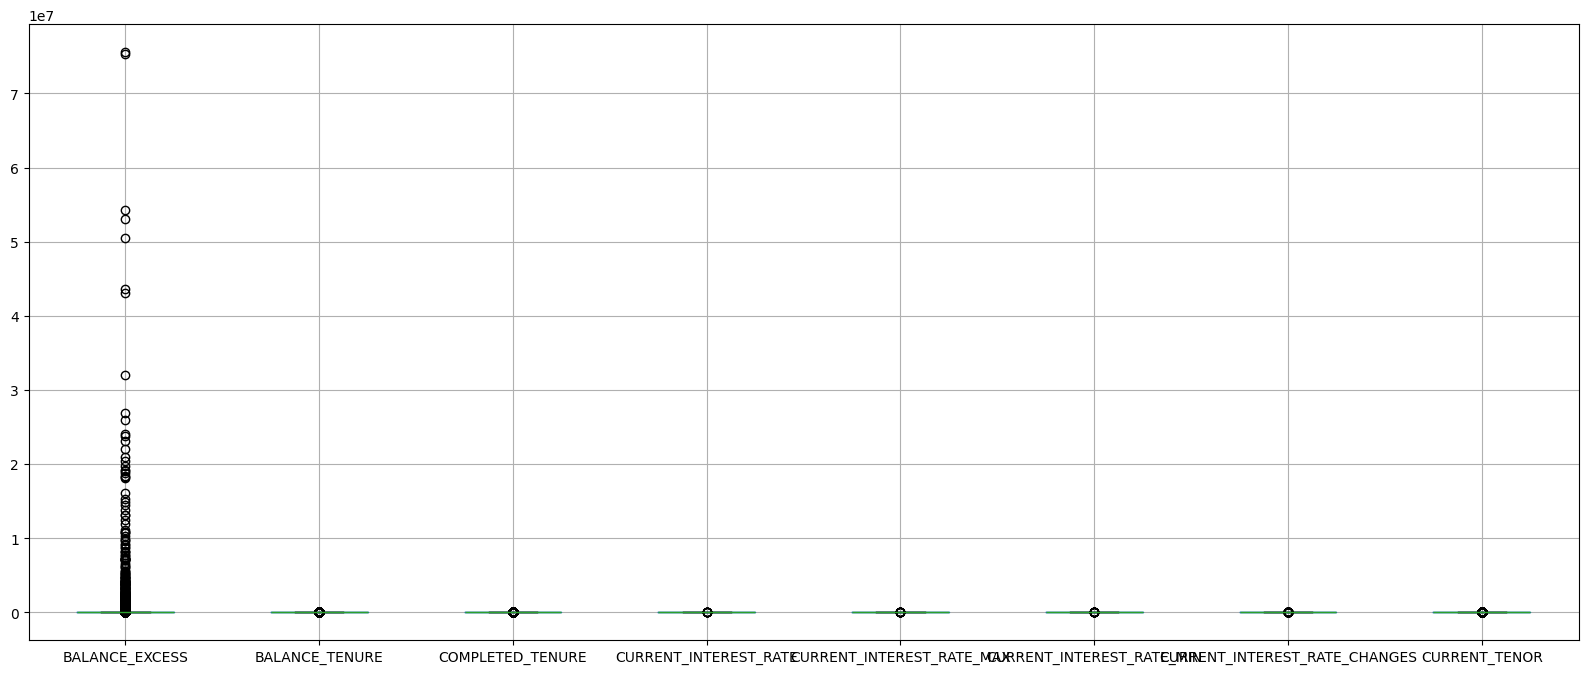

In [ ]:
plt.figure(figsize=(20,8))
df[['BALANCE_EXCESS','BALANCE_TENURE','COMPLETED_TENURE','CURRENT_INTEREST_RATE','CURRENT_INTEREST_RATE_MAX','CURRENT_INTEREST_RATE_MIN','CURRENT_INTEREST_RATE_CHANGES','CURRENT_TENOR']].boxplot()

<Axes: >

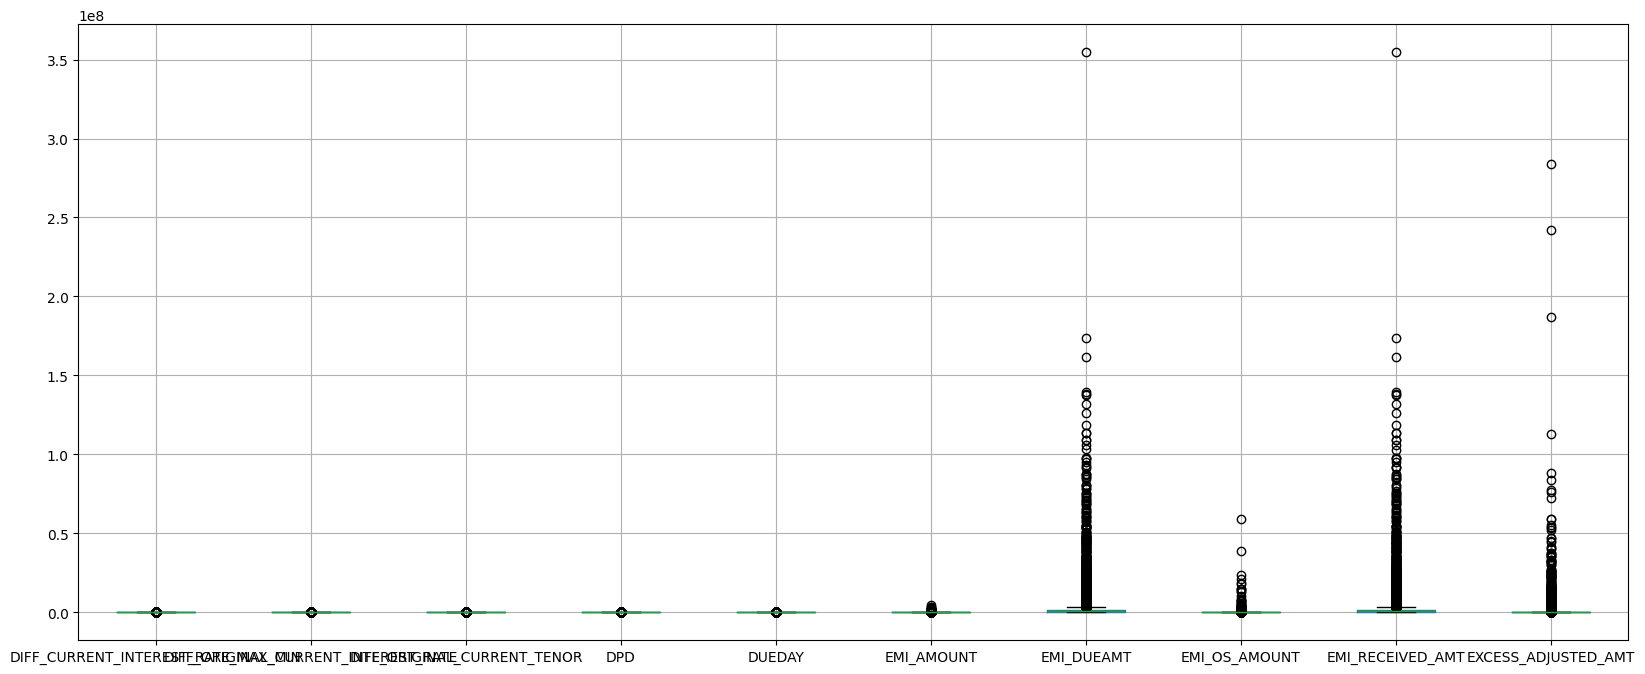

In [ ]:
plt.figure(figsize=(20,8))
df[['DIFF_CURRENT_INTEREST_RATE_MAX_MIN','DIFF_ORIGINAL_CURRENT_INTEREST_RATE','DIFF_ORIGINAL_CURRENT_TENOR','DPD','DUEDAY','EMI_AMOUNT','EMI_DUEAMT','EMI_OS_AMOUNT','EMI_RECEIVED_AMT','EXCESS_ADJUSTED_AMT']].boxplot()

<Axes: >

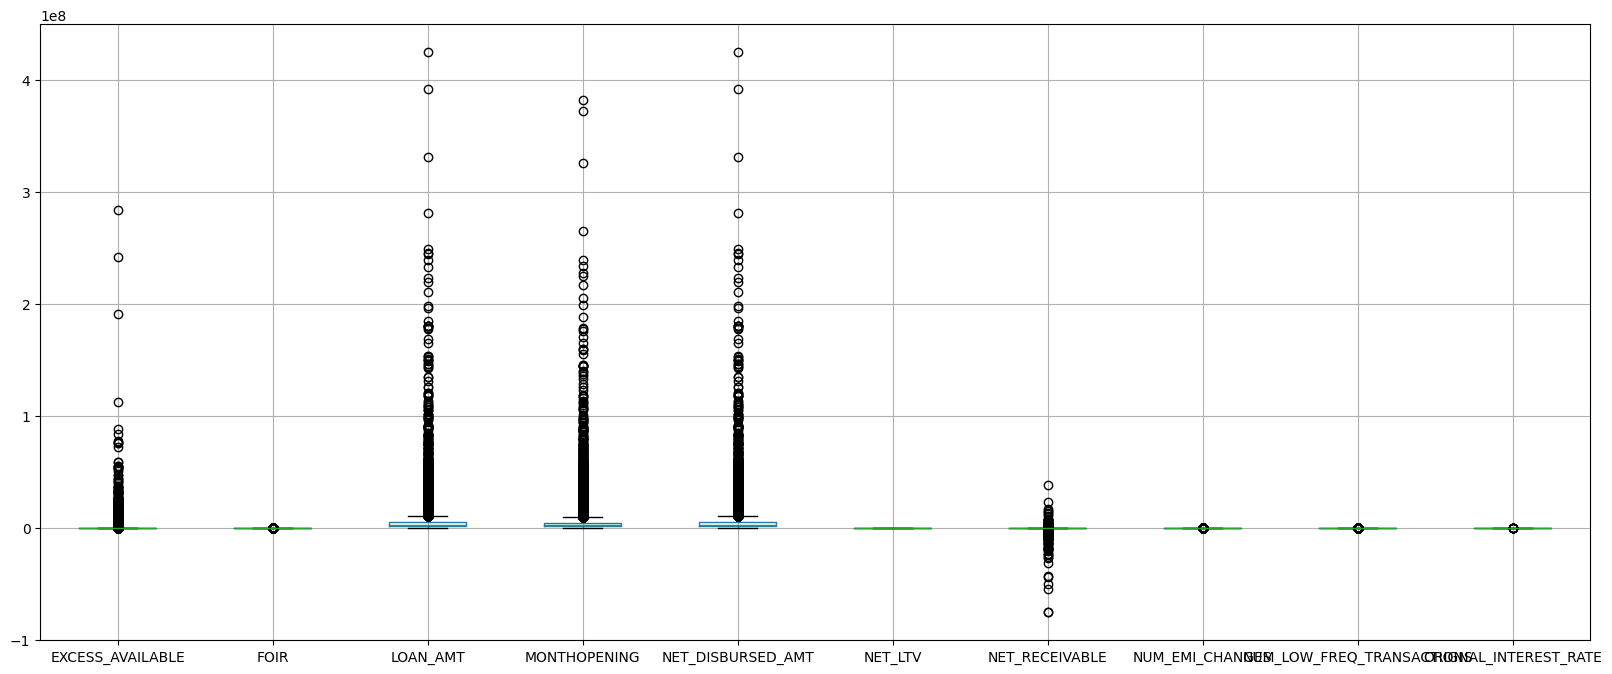

In [ ]:
plt.figure(figsize=(20,8))
df[['EXCESS_AVAILABLE','FOIR','LOAN_AMT','MONTHOPENING','NET_DISBURSED_AMT','NET_LTV','NET_RECEIVABLE','NUM_EMI_CHANGES','NUM_LOW_FREQ_TRANSACTIONS','ORIGNAL_INTEREST_RATE']].boxplot()

<Axes: >

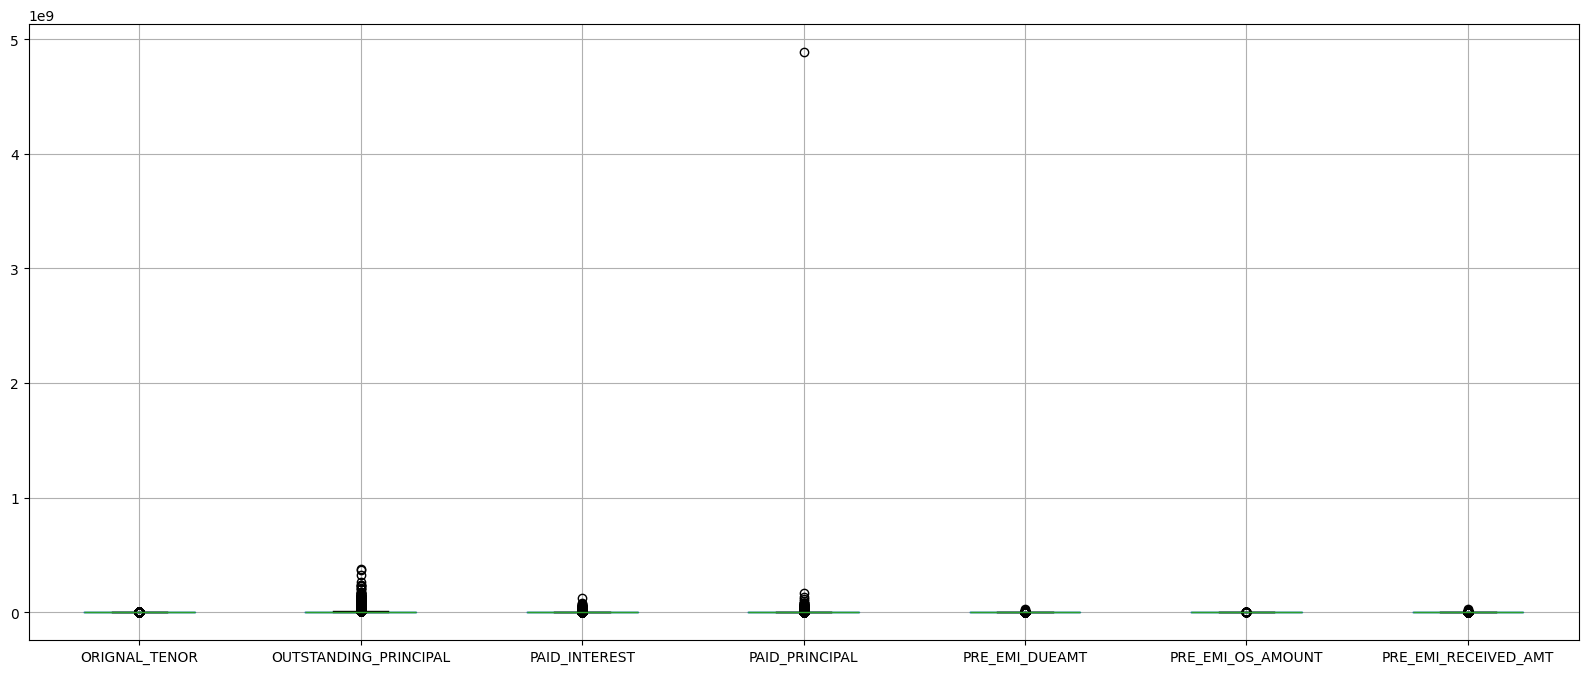

In [ ]:
plt.figure(figsize=(20,8))
df[['ORIGNAL_TENOR','OUTSTANDING_PRINCIPAL','PAID_INTEREST','PAID_PRINCIPAL','PRE_EMI_DUEAMT','PRE_EMI_OS_AMOUNT','PRE_EMI_RECEIVED_AMT']].boxplot()

In [ ]:
df_orignal=df

In [ ]:
from scipy.stats import zscore
for i in df.iloc[:,:-1]:
    if ((df[i].dtype=='float') | (df[i].dtype=='int')):
        df[[i]] = df[[i]].apply(zscore)
        df[[i]]=np.where(df[[i]]>3,3,df[[i]])
        df[[i]]=np.where(df[[i]]<-3,-3,df[[i]])

In [ ]:
df=pd.get_dummies(df,prefix='PRODUCT',columns=['PRODUCT'])

In [ ]:
t=df.drop(['BALANCE_TENURE','CURRENT_INTEREST_RATE','EMI_RECEIVED_AMT','NET_DISBURSED_AMT',
          'PRE_EMI_DUEAMT','CURRENT_INTEREST_RATE_MIN','CURRENT_INTEREST_RATE_MAX','LOAN_AMT',
          'MONTHOPENING','CURRENT_TENOR','PAID_INTEREST','BALANCE_EXCESS','EXCESS_AVAILABLE','EMI_AMOUNT',
           'CURRENT_INTEREST_RATE_CHANGES','FORECLOSURE'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
t_numeric = t.apply(pd.to_numeric, errors='coerce') # Convert to numeric, coercing errors
# Convert boolean columns to integers
for col in ['PRODUCT_HL', 'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP']:
    if col in t_numeric.columns:
        t_numeric[col] = t_numeric[col].astype(int)
vif = [variance_inflation_factor(t_numeric.values, ix) for ix in range(t_numeric.shape[1])]

In [ ]:
i=0
for column in t.columns:
    if i < len(t.columns):
        print (column ,"--->",  vif[i])
        i = i+1

COMPLETED_TENURE ---> 2.767398315786397
DIFF_CURRENT_INTEREST_RATE_MAX_MIN ---> 2.5328192009663373
DIFF_ORIGINAL_CURRENT_INTEREST_RATE ---> 2.1106355464724205
DIFF_ORIGINAL_CURRENT_TENOR ---> 1.9877807207877332
DPD ---> 3.024804507038472
DUEDAY ---> 1.2518237171107554
EMI_DUEAMT ---> 3.749089512718455
EMI_OS_AMOUNT ---> 2.9607258928949887
EXCESS_ADJUSTED_AMT ---> 2.029053929375883
FOIR ---> 1.1788478148388952
LATEST_TRANSACTION_MONTH ---> 1.4995730568461676
NET_LTV ---> 1.3191733898237799
NET_RECEIVABLE ---> 1.2398861112681694
NUM_EMI_CHANGES ---> 2.3965542493557654
NUM_LOW_FREQ_TRANSACTIONS ---> 2.9060758262549067
ORIGNAL_INTEREST_RATE ---> 2.7570481418545425
ORIGNAL_TENOR ---> 1.5061123354859116
OUTSTANDING_PRINCIPAL ---> 2.6228379319994297
PAID_PRINCIPAL ---> 2.29567817700601
PRE_EMI_OS_AMOUNT ---> 1.066060002457319
PRE_EMI_RECEIVED_AMT ---> 1.5255317998012101
PRODUCT_HL ---> 1.5677696083302233
PRODUCT_LAP ---> 2.187105678726077
PRODUCT_STHL ---> 2.0421736534815693
PRODUCT_STLAP ---

In [ ]:
df=df.drop(['BALANCE_TENURE','CURRENT_INTEREST_RATE','EMI_RECEIVED_AMT','NET_DISBURSED_AMT',
          'PRE_EMI_DUEAMT','CURRENT_INTEREST_RATE_MIN','CURRENT_INTEREST_RATE_MAX','LOAN_AMT',
          'MONTHOPENING','CURRENT_TENOR','PAID_INTEREST','BALANCE_EXCESS','EXCESS_AVAILABLE','EMI_AMOUNT',
           'CURRENT_INTEREST_RATE_CHANGES'],axis=1)

In [ ]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df)
    wss.append(KM.inertia_)

In [ ]:
wss

[228625.30776135306,
 194939.61246136276,
 170402.70157989036,
 153361.2325354122,
 141049.1628448494,
 131644.45402673437,
 126251.6644855755,
 122636.99019884589,
 116189.67792079784,
 111443.86944221194]

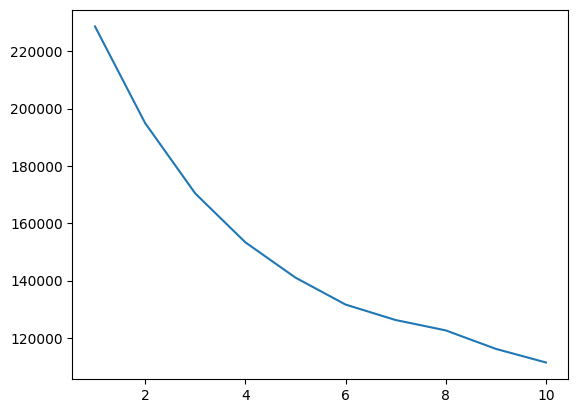

In [ ]:
plt.plot(range(1,11), wss)

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df)
labels = k_means.labels_

In [ ]:
data_df=df_orignal

In [ ]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,BALANCE_EXCESS,BALANCE_TENURE,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,CURRENT_TENOR,DIFF_CURRENT_INTEREST_RATE_MAX_MIN,DIFF_ORIGINAL_CURRENT_INTEREST_RATE,...,ORIGNAL_TENOR,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,PRODUCT,FORECLOSURE,Clus_kmeans
0,-0.058688,-2.698034,1.678425,-0.548842,-0.472236,-0.329545,0.210495,-2.477967,-0.298042,-2.750585,...,-1.420957,-0.440813,0.571754,0.308484,-0.132148,-0.023656,-0.131702,HL,1,1
1,-0.058688,-1.152678,1.253744,-0.423318,-0.472236,-0.213040,-0.670184,-0.907673,-0.620483,-3.000000,...,-0.075274,0.625465,1.303974,0.174692,0.112374,-0.023656,0.113269,HL,1,1
2,-0.058688,0.907796,3.000000,0.329825,0.534420,0.485993,1.091175,2.079300,0.024400,-3.000000,...,-0.075274,-0.189940,0.658984,0.001994,-0.137557,-0.023656,-0.137122,HL,1,1
3,-0.058688,-2.698034,3.000000,-1.427508,-0.472236,-1.145083,2.852534,-1.692820,1.959050,-0.274597,...,-0.075274,-0.447220,1.206267,0.262055,0.006164,-0.023656,0.006864,HL,1,0
4,-0.058688,0.658041,3.000000,0.078777,0.282756,0.252982,1.091175,1.942752,0.024400,-3.000000,...,-0.075274,0.176769,1.847877,-0.009050,-0.079975,-0.023656,-0.079434,HL,1,1


In [ ]:
silhouette_score(df,labels)

np.float64(0.1802391589085411)

In [ ]:
data_df['Clus_kmeans'].value_counts()

,count
Clus_kmeans,
2,10221
1,5336
0,4379


In [ ]:
aggdata = data_df.groupby('Clus_kmeans').mean(numeric_only=True)

In [ ]:
aggdata.T

Clus_kmeans,0,1,2
BALANCE_EXCESS,0.000722,-0.045379,-0.040300
BALANCE_TENURE,-0.904931,0.456082,0.131867
COMPLETED_TENURE,1.230913,-0.264323,-0.409674
CURRENT_INTEREST_RATE,0.576481,-0.306235,-0.087639
CURRENT_INTEREST_RATE_MAX,0.715020,-0.348619,-0.126201
CURRENT_INTEREST_RATE_MIN,0.580303,-0.650251,0.092387
CURRENT_INTEREST_RATE_CHANGES,0.218039,0.927314,-0.601339
CURRENT_TENOR,-0.632904,0.421347,0.029006
DIFF_CURRENT_INTEREST_RATE_MAX_MIN,0.173332,0.898172,-0.579078
DIFF_ORIGINAL_CURRENT_INTEREST_RATE,0.523828,-1.227853,0.401851


In [ ]:
x=df.drop(['FORECLOSURE'],axis=1)
y=df['FORECLOSURE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# LOGISTIC REGRESSION (With SMOTE)

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(x_train_res, y_train_res)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Logistic Regression model score for Training Data is',model.score(x_train,y_train))
print('Logistic Regression model score for Test Data is',model.score(x_test,y_test))

Logistic Regression model score for Training Data is 0.9424579003941239
Logistic Regression model score for Test Data is 0.9404781809062029


AUC: 0.983


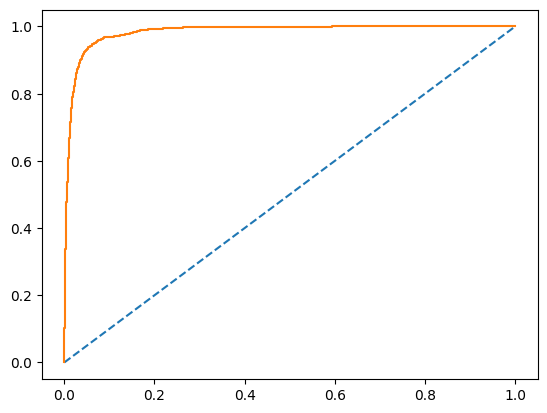

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[11973,   730],
       [   73,  1179]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     12703
           1       0.62      0.94      0.75      1252

    accuracy                           0.94     13955
   macro avg       0.81      0.94      0.86     13955
weighted avg       0.96      0.94      0.95     13955



AUC: 0.983


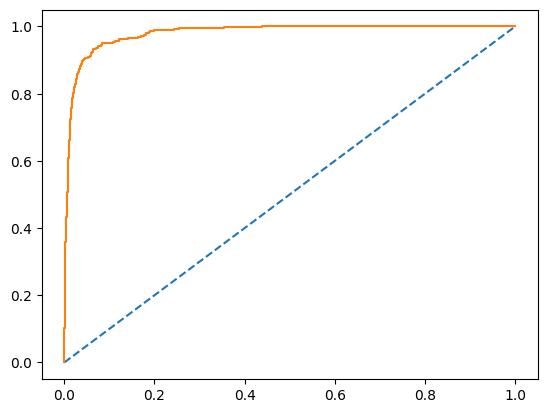

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5130,  308],
       [  48,  495]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      5438
           1       0.62      0.91      0.74       543

    accuracy                           0.94      5981
   macro avg       0.80      0.93      0.85      5981
weighted avg       0.96      0.94      0.95      5981



In [ ]:
fieldList = np.array(list(x)).reshape(-1,1)
coeffs = np.reshape(np.round(model.coef_,5),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
print(pd.DataFrame(coeffs,columns=['Field','Coeff']))

                                  Field     Coeff
0                      COMPLETED_TENURE   0.43381
1    DIFF_CURRENT_INTEREST_RATE_MAX_MIN  -1.20717
2   DIFF_ORIGINAL_CURRENT_INTEREST_RATE   0.44272
3           DIFF_ORIGINAL_CURRENT_TENOR   0.20328
4                                   DPD  -0.47086
5                                DUEDAY   0.19539
6                            EMI_DUEAMT   0.71495
7                         EMI_OS_AMOUNT   0.36736
8                   EXCESS_ADJUSTED_AMT   0.72626
9                                  FOIR   0.16668
10             LATEST_TRANSACTION_MONTH  -2.41827
11                              NET_LTV  -0.13942
12                       NET_RECEIVABLE  -1.40371
13                      NUM_EMI_CHANGES    0.1235
14            NUM_LOW_FREQ_TRANSACTIONS  -0.41001
15                ORIGNAL_INTEREST_RATE   1.59404
16                        ORIGNAL_TENOR   0.00375
17                OUTSTANDING_PRINCIPAL   0.17978
18                       PAID_PRINCIPAL  -3.14369


# Logistic Regression (Without SMOTE)

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Logistic Regression model score for Training Data is',model.score(x_train,y_train))
print('Logistic Regression model score for Test Data is',model.score(x_test,y_test))

Logistic Regression model score for Training Data is 0.9628806879254748
Logistic Regression model score for Test Data is 0.960541715432202


AUC: 0.982


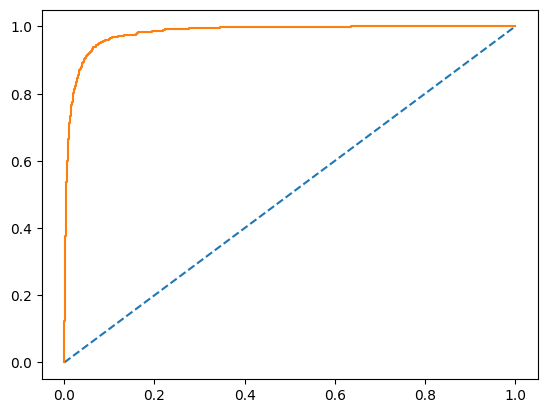

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12560,   143],
       [  375,   877]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12703
           1       0.86      0.70      0.77      1252

    accuracy                           0.96     13955
   macro avg       0.92      0.84      0.88     13955
weighted avg       0.96      0.96      0.96     13955



AUC: 0.982


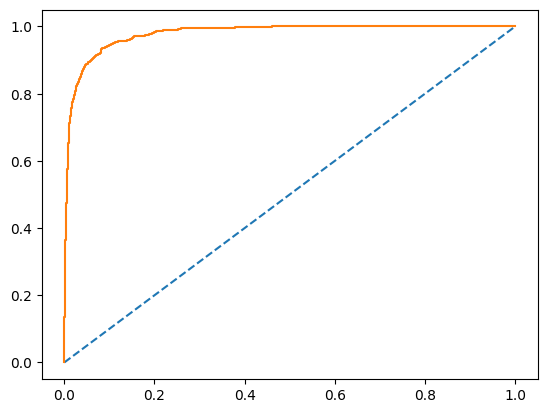

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5383,   55],
       [ 181,  362]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5438
           1       0.87      0.67      0.75       543

    accuracy                           0.96      5981
   macro avg       0.92      0.83      0.87      5981
weighted avg       0.96      0.96      0.96      5981



In [ ]:
fieldList = np.array(list(x)).reshape(-1,1)
coeffs = np.reshape(np.round(model.coef_,5),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
print(pd.DataFrame(coeffs,columns=['Field','Coeff']))

                                  Field     Coeff
0                      COMPLETED_TENURE   0.29797
1    DIFF_CURRENT_INTEREST_RATE_MAX_MIN  -0.85922
2   DIFF_ORIGINAL_CURRENT_INTEREST_RATE   0.27564
3           DIFF_ORIGINAL_CURRENT_TENOR   0.19722
4                                   DPD  -0.24557
5                                DUEDAY   0.21207
6                            EMI_DUEAMT   0.69399
7                         EMI_OS_AMOUNT   0.09637
8                   EXCESS_ADJUSTED_AMT   0.37043
9                                  FOIR   0.18463
10             LATEST_TRANSACTION_MONTH  -1.65202
11                              NET_LTV  -0.22354
12                       NET_RECEIVABLE  -1.25567
13                      NUM_EMI_CHANGES   0.09735
14            NUM_LOW_FREQ_TRANSACTIONS  -0.20358
15                ORIGNAL_INTEREST_RATE   1.38837
16                        ORIGNAL_TENOR   0.09773
17                OUTSTANDING_PRINCIPAL  -0.20519
18                       PAID_PRINCIPAL  -1.42497


# LINEAR DISCRIMINANT ANALYSIS (With SMOTE)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()
model.fit(x_train_res,y_train_res)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Linear Discriminant Analysis training data score is', model.score(x_train,y_train))
print('Linear Discriminant Analysis test data score is', model.score(x_test,y_test))

Linear Discriminant Analysis training data score is 0.8973844500179148
Linear Discriminant Analysis test data score is 0.8951680321016552


AUC: 0.975


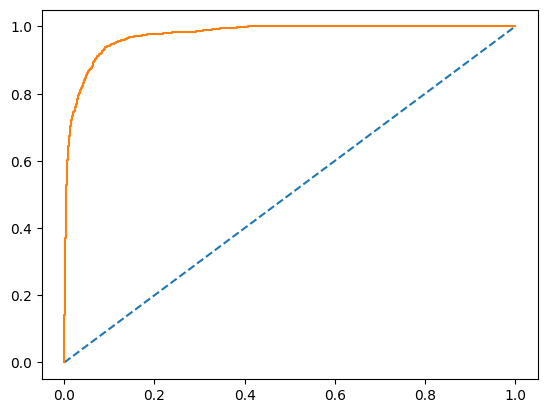

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[11335,  1368],
       [   64,  1188]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     12703
           1       0.46      0.95      0.62      1252

    accuracy                           0.90     13955
   macro avg       0.73      0.92      0.78     13955
weighted avg       0.95      0.90      0.91     13955



AUC: 0.975


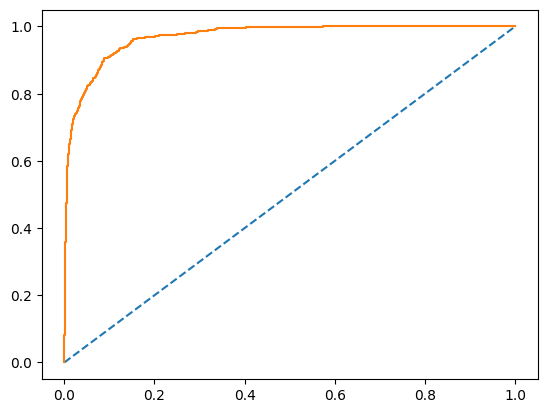

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[4857,  581],
       [  46,  497]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      5438
           1       0.46      0.92      0.61       543

    accuracy                           0.90      5981
   macro avg       0.73      0.90      0.78      5981
weighted avg       0.94      0.90      0.91      5981



# Linear Discriminant Analysis (Without SMOTE)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()
model.fit(x_train,y_train)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Linear Discriminant Analysis training data score is', model.score(x_train,y_train))
print('Linear Discriminant Analysis test data score is', model.score(x_test,y_test))

Linear Discriminant Analysis training data score is 0.938659978502329
Linear Discriminant Analysis test data score is 0.9376358468483531


AUC: 0.959


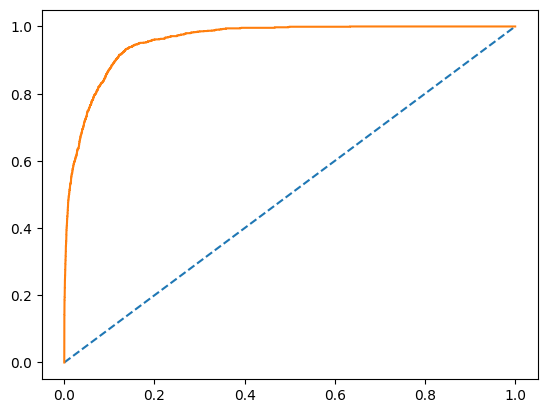

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12301,   402],
       [  454,   798]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     12703
           1       0.67      0.64      0.65      1252

    accuracy                           0.94     13955
   macro avg       0.81      0.80      0.81     13955
weighted avg       0.94      0.94      0.94     13955



AUC: 0.959


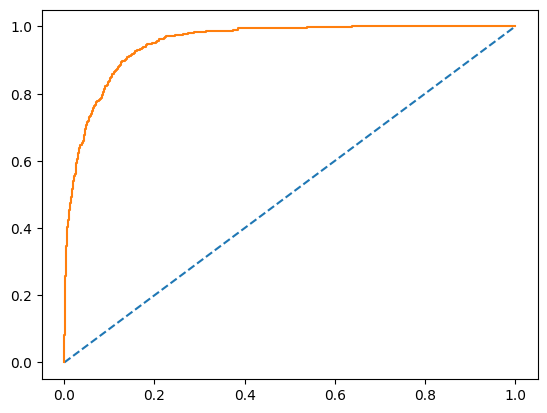

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5283,  155],
       [ 218,  325]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5438
           1       0.68      0.60      0.64       543

    accuracy                           0.94      5981
   macro avg       0.82      0.79      0.80      5981
weighted avg       0.93      0.94      0.94      5981



# KNN Algorithm (With SMOTE)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train_res,y_train_res)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('KNN Algorithm training data score is', model.score(x_train,y_train))
print('KNN Algorithm test data score is', model.score(x_test,y_test))

KNN Algorithm training data score is 0.9754209960587603
KNN Algorithm test data score is 0.9570305968901521


AUC: 1.000


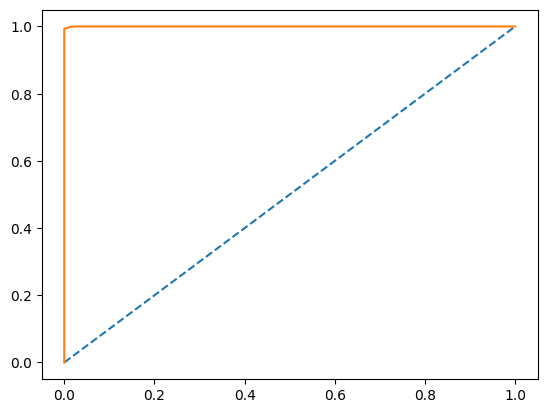

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12360,   343],
       [    0,  1252]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     12703
           1       0.78      1.00      0.88      1252

    accuracy                           0.98     13955
   macro avg       0.89      0.99      0.93     13955
weighted avg       0.98      0.98      0.98     13955



AUC: 1.000


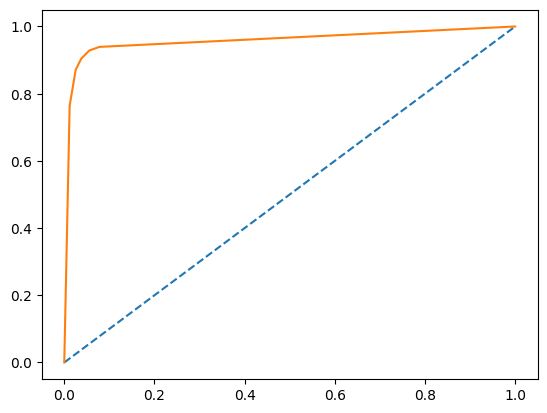

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5233,  205],
       [  52,  491]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      5438
           1       0.71      0.90      0.79       543

    accuracy                           0.96      5981
   macro avg       0.85      0.93      0.88      5981
weighted avg       0.96      0.96      0.96      5981



In [ ]:
model=KNeighborsClassifier(n_neighbors=4,leaf_size=35,algorithm='brute',p=1)
model.fit(x_train_res,y_train_res)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('KNN Algorithm training data score is', model.score(x_train,y_train))
print('KNN Algorithm test data score is', model.score(x_test,y_test))

KNN Algorithm training data score is 0.9917592260838409
KNN Algorithm test data score is 0.9707406788162515


In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12588,   115],
       [    0,  1252]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12703
           1       0.92      1.00      0.96      1252

    accuracy                           0.99     13955
   macro avg       0.96      1.00      0.98     13955
weighted avg       0.99      0.99      0.99     13955



In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5339,   99],
       [  76,  467]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5438
           1       0.83      0.86      0.84       543

    accuracy                           0.97      5981
   macro avg       0.91      0.92      0.91      5981
weighted avg       0.97      0.97      0.97      5981



AUC: 1.000


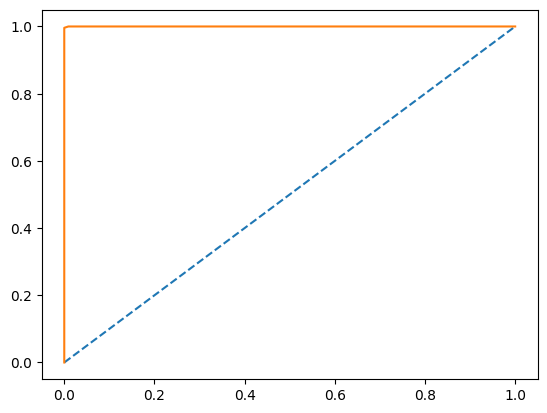

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


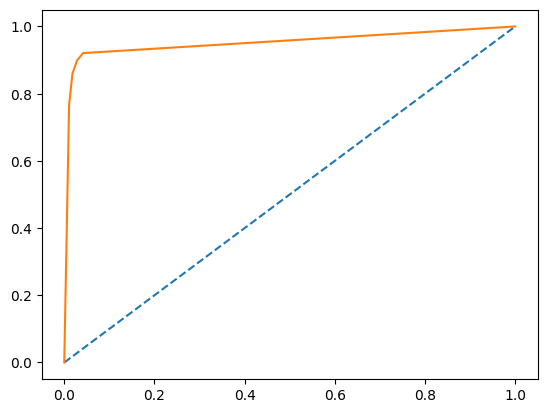

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# KNN Algorithm (Without SMOTE)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('KNN Algorithm training data score is', model.score(x_train,y_train))
print('KNN Algorithm test data score is', model.score(x_test,y_test))

KNN Algorithm training data score is 0.9784306700107488
KNN Algorithm test data score is 0.9690687176057515


AUC: 0.996


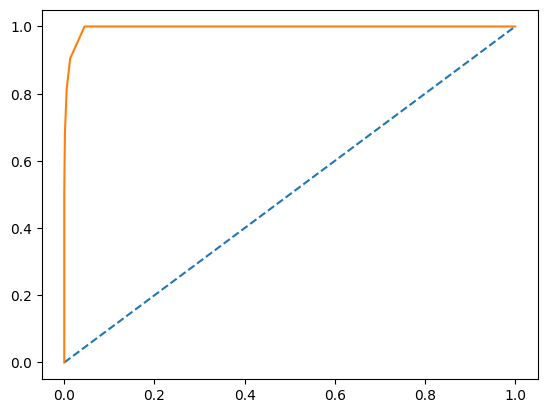

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12634,    69],
       [  232,  1020]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12703
           1       0.94      0.81      0.87      1252

    accuracy                           0.98     13955
   macro avg       0.96      0.90      0.93     13955
weighted avg       0.98      0.98      0.98     13955



AUC: 0.996


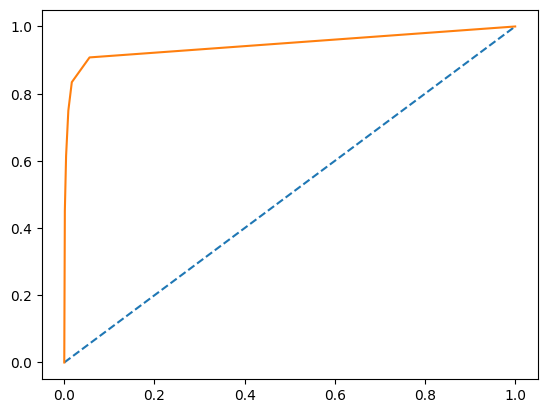

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5389,   49],
       [ 136,  407]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5438
           1       0.89      0.75      0.81       543

    accuracy                           0.97      5981
   macro avg       0.93      0.87      0.90      5981
weighted avg       0.97      0.97      0.97      5981



In [ ]:
model=KNeighborsClassifier(n_neighbors=4,leaf_size=15,algorithm='brute',p=1)
model.fit(x_train,y_train)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('KNN Algorithm training data score is', model.score(x_train,y_train))
print('KNN Algorithm test data score is', model.score(x_test,y_test))

KNN Algorithm training data score is 0.979003941239699
KNN Algorithm test data score is 0.9690687176057515


In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12677,    26],
       [  267,   985]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12703
           1       0.97      0.79      0.87      1252

    accuracy                           0.98     13955
   macro avg       0.98      0.89      0.93     13955
weighted avg       0.98      0.98      0.98     13955



In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5414,   24],
       [ 161,  382]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5438
           1       0.94      0.70      0.81       543

    accuracy                           0.97      5981
   macro avg       0.96      0.85      0.89      5981
weighted avg       0.97      0.97      0.97      5981



AUC: 0.998


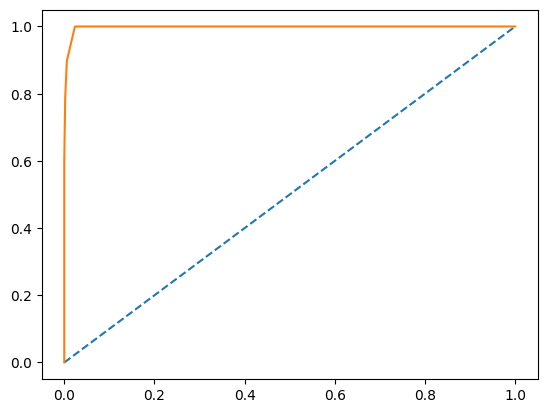

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.998


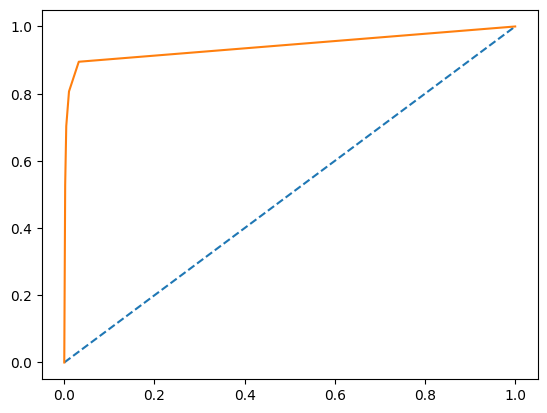

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Naive Bayes Algorithm (With SMOTE)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train_res,y_train_res)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Naive Bayes Algorithm training data score is', model.score(x_train,y_train))
print('Naive Bayes Algorithm test data score is', model.score(x_test,y_test))

Naive Bayes Algorithm training data score is 0.5552131852382659
Naive Bayes Algorithm test data score is 0.5567630830964722


AUC: 0.950


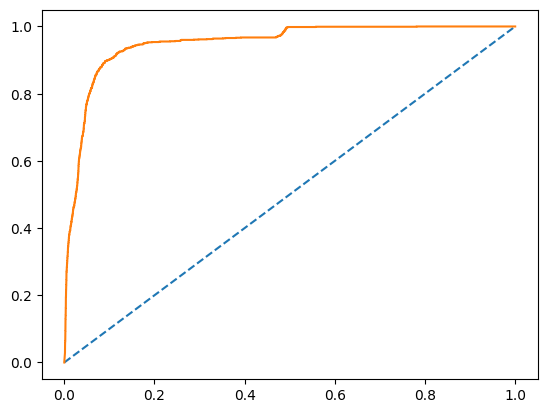

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[6515, 6188],
       [  19, 1233]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.51      0.68     12703
           1       0.17      0.98      0.28      1252

    accuracy                           0.56     13955
   macro avg       0.58      0.75      0.48     13955
weighted avg       0.92      0.56      0.64     13955



AUC: 0.950


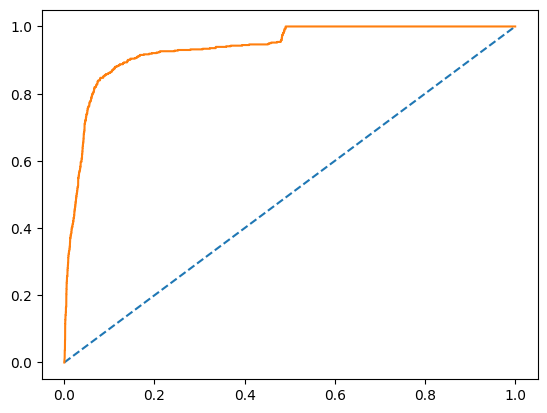

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[2800, 2638],
       [  13,  530]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       1.00      0.51      0.68      5438
           1       0.17      0.98      0.29       543

    accuracy                           0.56      5981
   macro avg       0.58      0.75      0.48      5981
weighted avg       0.92      0.56      0.64      5981



# Naive Bayes Algorithm (Without SMOTE)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Naive Bayes Algorithm training data score is', model.score(x_train,y_train))
print('Naive Bayes Algorithm test data score is', model.score(x_test,y_test))

Naive Bayes Algorithm training data score is 0.5508419921175206
Naive Bayes Algorithm test data score is 0.5534191606754724


AUC: 0.957


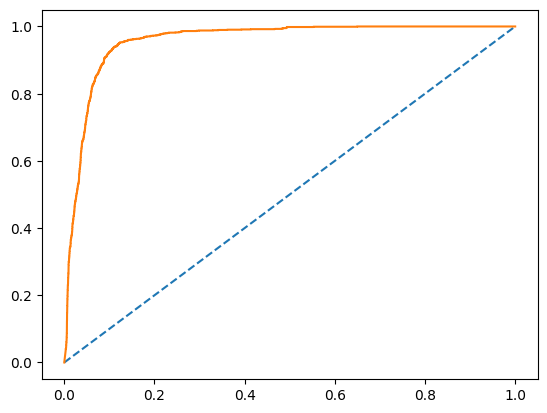

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[6439, 6264],
       [   4, 1248]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67     12703
           1       0.17      1.00      0.28      1252

    accuracy                           0.55     13955
   macro avg       0.58      0.75      0.48     13955
weighted avg       0.92      0.55      0.64     13955



AUC: 0.957


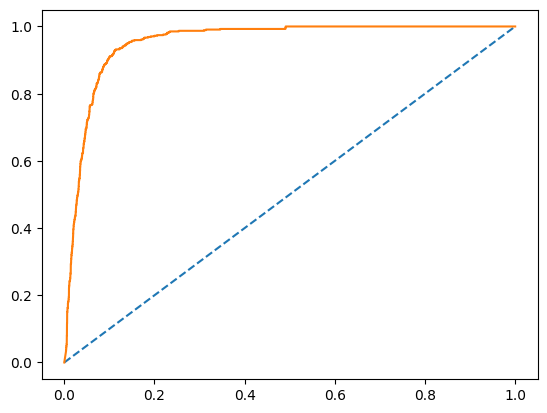

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[2769, 2669],
       [   2,  541]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      5438
           1       0.17      1.00      0.29       543

    accuracy                           0.55      5981
   macro avg       0.58      0.75      0.48      5981
weighted avg       0.92      0.55      0.64      5981



# Support Vector Machine (With SMOTE)

In [ ]:
from sklearn import svm
model= svm.SVC(random_state=1,probability=True)
model.fit(x_train_res, y_train_res)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Support Vector Machine model training data score is', model.score(x_train,y_train))
print('Support Vector Machine model test data score is', model.score(x_test,y_test))

Support Vector Machine model training data score is 0.9865997850232892
Support Vector Machine model test data score is 0.980103661595051


AUC: 0.996


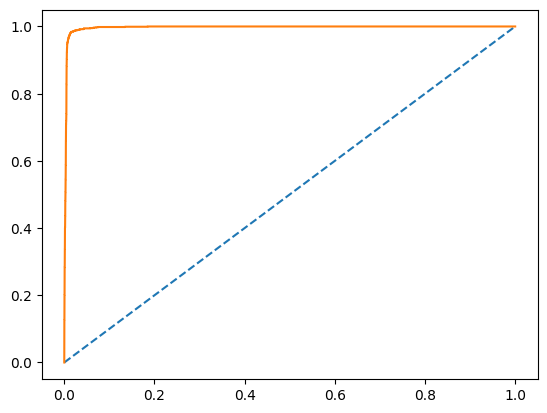

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12546,   157],
       [   30,  1222]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12703
           1       0.89      0.98      0.93      1252

    accuracy                           0.99     13955
   macro avg       0.94      0.98      0.96     13955
weighted avg       0.99      0.99      0.99     13955



AUC: 0.996


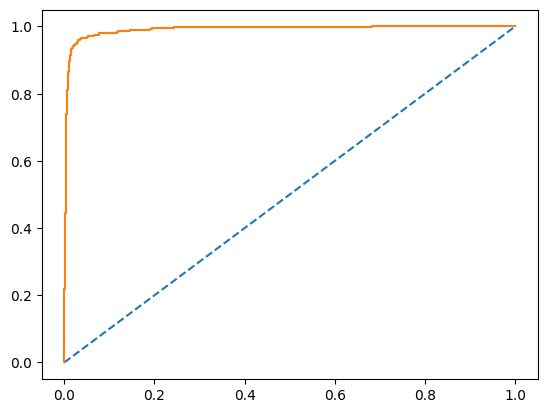

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5367,   71],
       [  48,  495]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5438
           1       0.87      0.91      0.89       543

    accuracy                           0.98      5981
   macro avg       0.93      0.95      0.94      5981
weighted avg       0.98      0.98      0.98      5981



In [ ]:
from sklearn import svm
model= svm.SVC(random_state=1,probability=True,kernel='poly',degree=2)
model.fit(x_train_res, y_train_res)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Support Vector Machine model training data score is', model.score(x_train,y_train))
print('Support Vector Machine model test data score is', model.score(x_test,y_test))

Support Vector Machine model training data score is 0.9799355069867431
Support Vector Machine model test data score is 0.9747533857214513


AUC: 0.992


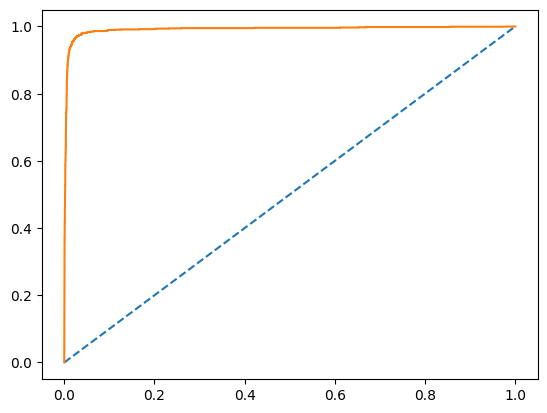

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12486,   217],
       [   63,  1189]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     12703
           1       0.85      0.95      0.89      1252

    accuracy                           0.98     13955
   macro avg       0.92      0.97      0.94     13955
weighted avg       0.98      0.98      0.98     13955



AUC: 0.992


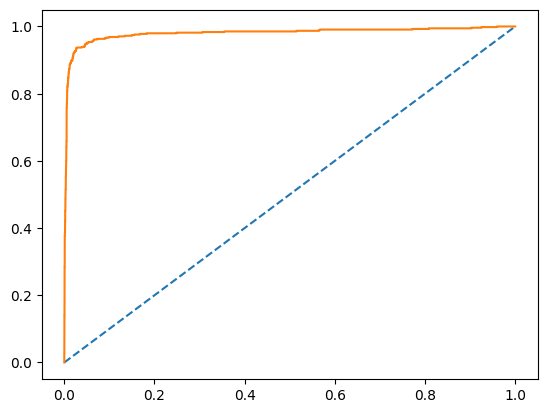

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5338,  100],
       [  51,  492]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5438
           1       0.83      0.91      0.87       543

    accuracy                           0.97      5981
   macro avg       0.91      0.94      0.93      5981
weighted avg       0.98      0.97      0.98      5981



# Support Vector Machine (Without SMOTE)

In [ ]:
from sklearn import svm
model= svm.SVC(random_state=1,probability=True)
model.fit(x_train, y_train)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Support Vector Machine model training data score is', model.score(x_train,y_train))
print('Support Vector Machine model test data score is', model.score(x_test,y_test))

Support Vector Machine model training data score is 0.9852382658545324
Support Vector Machine model test data score is 0.979769269352951


AUC: 0.996


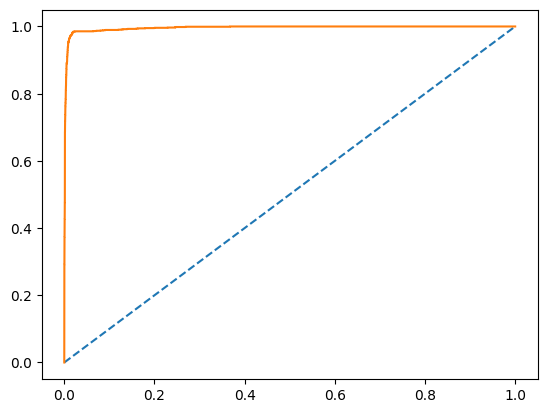

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12634,    69],
       [  137,  1115]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12703
           1       0.94      0.89      0.92      1252

    accuracy                           0.99     13955
   macro avg       0.97      0.94      0.95     13955
weighted avg       0.99      0.99      0.99     13955



AUC: 0.996


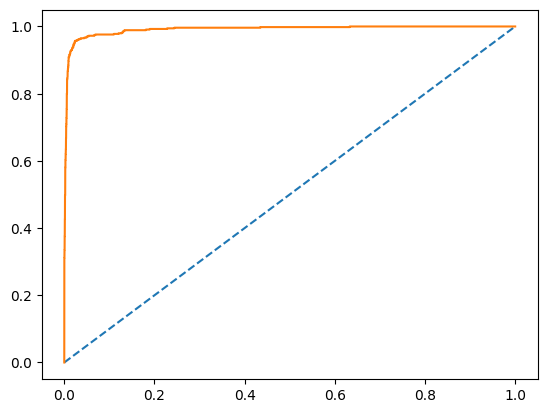

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5403,   35],
       [  86,  457]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5438
           1       0.93      0.84      0.88       543

    accuracy                           0.98      5981
   macro avg       0.96      0.92      0.94      5981
weighted avg       0.98      0.98      0.98      5981



In [ ]:
from sklearn import svm
model= svm.SVC(random_state=1,probability=True,kernel='poly',degree=3)
model.fit(x_train, y_train)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Support Vector Machine model training data score is', model.score(x_train,y_train))
print('Support Vector Machine model test data score is', model.score(x_test,y_test))

Support Vector Machine model training data score is 0.980293801504837
Support Vector Machine model test data score is 0.9695703059689015


AUC: 0.995


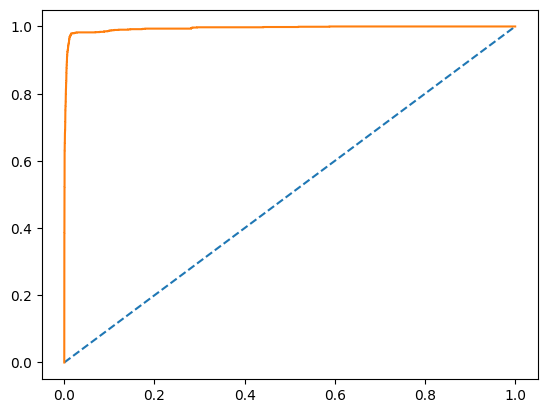

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12652,    51],
       [  224,  1028]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12703
           1       0.95      0.82      0.88      1252

    accuracy                           0.98     13955
   macro avg       0.97      0.91      0.94     13955
weighted avg       0.98      0.98      0.98     13955



AUC: 0.995


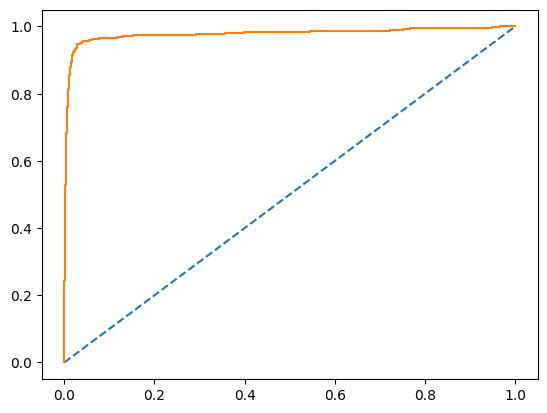

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5402,   36],
       [ 146,  397]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5438
           1       0.92      0.73      0.81       543

    accuracy                           0.97      5981
   macro avg       0.95      0.86      0.90      5981
weighted avg       0.97      0.97      0.97      5981



# Random Forest Classifier (With SMOTE)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(x_train_res,y_train_res)
ytrain_predict=rfcl.predict(x_train)
ytest_predict=rfcl.predict(x_test)
print('Random Forest Classifier training data score is', rfcl.score(x_train,y_train))
print('Random Forest Classifier test data score is', rfcl.score(x_test,y_test))

Random Forest Classifier training data score is 1.0
Random Forest Classifier test data score is 0.9827787995318509


AUC: 1.000


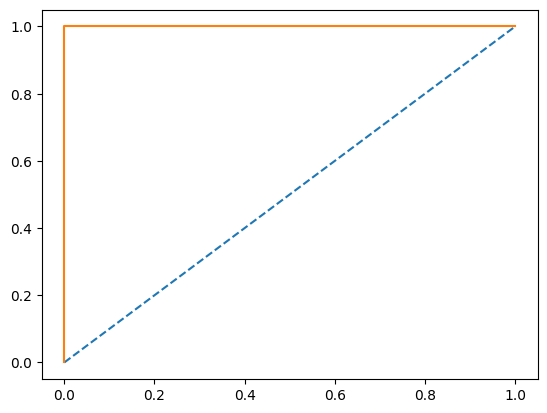

In [ ]:
# predict probabilities
probs = rfcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


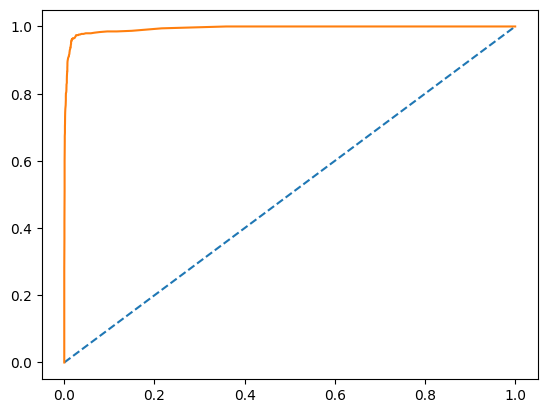

In [ ]:
# predict probabilities
probs = rfcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12703,     0],
       [    0,  1252]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12703
           1       1.00      1.00      1.00      1252

    accuracy                           1.00     13955
   macro avg       1.00      1.00      1.00     13955
weighted avg       1.00      1.00      1.00     13955



In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5381,   57],
       [  46,  497]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5438
           1       0.90      0.92      0.91       543

    accuracy                           0.98      5981
   macro avg       0.94      0.95      0.95      5981
weighted avg       0.98      0.98      0.98      5981



In [ ]:
rfcl = RandomForestClassifier(max_depth=20,max_features=17,min_samples_leaf=15,min_samples_split=30,n_estimators=200)
rfcl = rfcl.fit(x_train_res,y_train_res)
ytrain_predict=rfcl.predict(x_train)
ytest_predict=rfcl.predict(x_test)
print('Random Forest Classifier training data score is', rfcl.score(x_train,y_train))
print('Random Forest Classifier test data score is', rfcl.score(x_test,y_test))

Random Forest Classifier training data score is 0.9843783590111072
Random Forest Classifier test data score is 0.980438053837151


In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12532,   171],
       [   47,  1205]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12703
           1       0.88      0.96      0.92      1252

    accuracy                           0.98     13955
   macro avg       0.94      0.97      0.95     13955
weighted avg       0.99      0.98      0.98     13955



In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5350,   88],
       [  29,  514]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5438
           1       0.85      0.95      0.90       543

    accuracy                           0.98      5981
   macro avg       0.92      0.97      0.94      5981
weighted avg       0.98      0.98      0.98      5981



AUC: 0.998


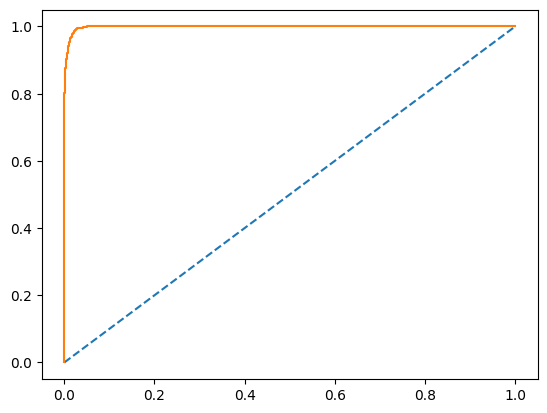

In [ ]:
# predict probabilities
probs = rfcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.998


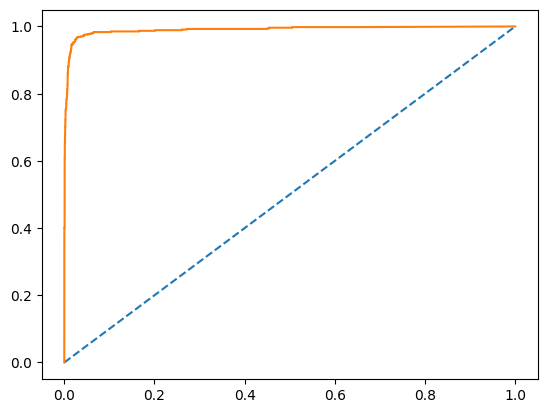

In [ ]:
# predict probabilities
probs = rfcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
i=0
for column in x_train.columns:
    if i < len(x_train.columns):
        print (column ,"--->",  rfcl.feature_importances_[i])
        i = i+1

COMPLETED_TENURE ---> 0.018434556390832222
DIFF_CURRENT_INTEREST_RATE_MAX_MIN ---> 0.010990100056961483
DIFF_ORIGINAL_CURRENT_INTEREST_RATE ---> 0.002992525644913476
DIFF_ORIGINAL_CURRENT_TENOR ---> 0.004204403219646757
DPD ---> 0.0019927927275985684
DUEDAY ---> 0.004816474812244202
EMI_DUEAMT ---> 0.014380203854946387
EMI_OS_AMOUNT ---> 0.0007084886582119144
EXCESS_ADJUSTED_AMT ---> 0.0011473574649297944
FOIR ---> 0.0011447884523492682
LATEST_TRANSACTION_MONTH ---> 0.6236344111430653
NET_LTV ---> 0.0012896806186646487
NET_RECEIVABLE ---> 0.0032620539854810978
NUM_EMI_CHANGES ---> 0.003856538369079123
NUM_LOW_FREQ_TRANSACTIONS ---> 0.004913730570318197
ORIGNAL_INTEREST_RATE ---> 0.015097614746351247
ORIGNAL_TENOR ---> 0.0014441897159464714
OUTSTANDING_PRINCIPAL ---> 0.0015899064727243775
PAID_PRINCIPAL ---> 0.027534897639297885
PRE_EMI_OS_AMOUNT ---> 0.0
PRE_EMI_RECEIVED_AMT ---> 0.004547891956074534
PRODUCT_HL ---> 0.0320215056968615
PRODUCT_LAP ---> 0.15498958830383536
PRODUCT_STHL -

# Random Forest Classifier (Without SMOTE)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(x_train,y_train)
ytrain_predict=rfcl.predict(x_train)
ytest_predict=rfcl.predict(x_test)
print('Random Forest Classifier training data score is', rfcl.score(x_train,y_train))
print('Random Forest Classifier test data score is', rfcl.score(x_test,y_test))

Random Forest Classifier training data score is 1.0
Random Forest Classifier test data score is 0.9837819762581508


AUC: 1.000


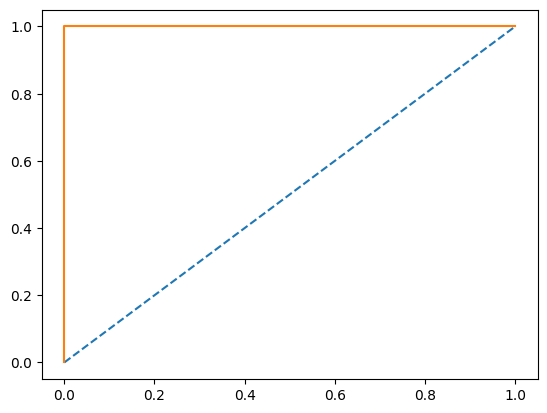

In [ ]:
# predict probabilities
probs = rfcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


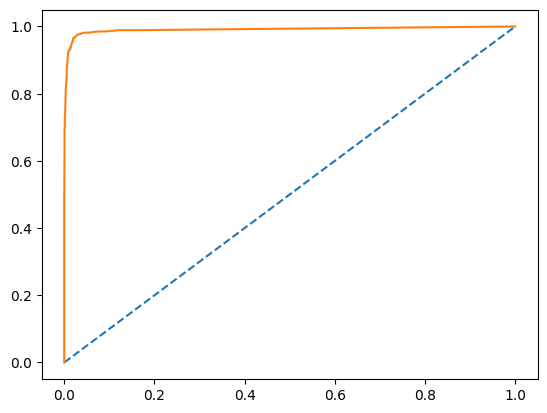

In [ ]:
# predict probabilities
probs = rfcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12703,     0],
       [    0,  1252]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12703
           1       1.00      1.00      1.00      1252

    accuracy                           1.00     13955
   macro avg       1.00      1.00      1.00     13955
weighted avg       1.00      1.00      1.00     13955



In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5399,   39],
       [  58,  485]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5438
           1       0.93      0.89      0.91       543

    accuracy                           0.98      5981
   macro avg       0.96      0.94      0.95      5981
weighted avg       0.98      0.98      0.98      5981



In [ ]:
rfcl = RandomForestClassifier(max_depth=20,max_features=18,min_samples_leaf=30,min_samples_split=100,n_estimators=500)
rfcl = rfcl.fit(x_train,y_train)
ytrain_predict=rfcl.predict(x_train)
ytest_predict=rfcl.predict(x_test)
print('Random Forest Classifier training data score is', rfcl.score(x_train,y_train))
print('Random Forest Classifier test data score is', rfcl.score(x_test,y_test))

Random Forest Classifier training data score is 0.9808670727337871
Random Forest Classifier test data score is 0.9775957197793012


In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12574,   129],
       [  138,  1114]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12703
           1       0.90      0.89      0.89      1252

    accuracy                           0.98     13955
   macro avg       0.94      0.94      0.94     13955
weighted avg       0.98      0.98      0.98     13955



In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5377,   61],
       [  73,  470]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5438
           1       0.89      0.87      0.88       543

    accuracy                           0.98      5981
   macro avg       0.94      0.93      0.93      5981
weighted avg       0.98      0.98      0.98      5981



AUC: 0.996


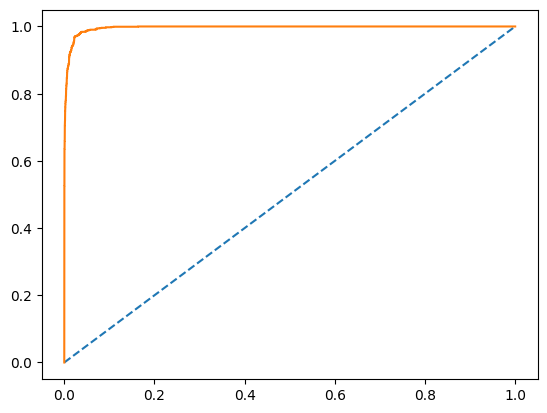

In [ ]:
# predict probabilities
probs = rfcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.996


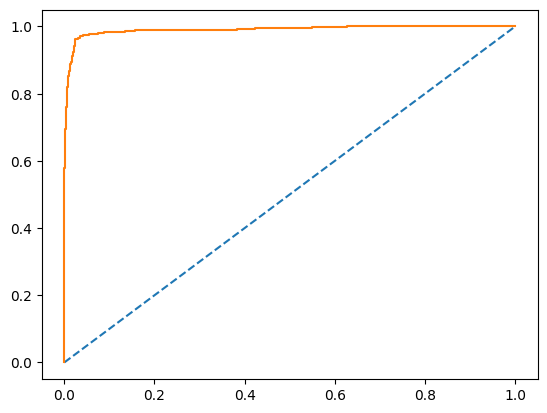

In [ ]:
# predict probabilities
probs = rfcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# AdaptiveBoost Algorithm (With SMOTE)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100,random_state=1)
model.fit(x_train_res,y_train_res)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Adaptive Boosting training data score is', model.score(x_train,y_train))
print('Adaptive Boosting test data score is',model.score(x_test,y_test))

Adaptive Boosting training data score is 0.9715514152633464
Adaptive Boosting test data score is 0.9690687176057515


AUC: 0.992


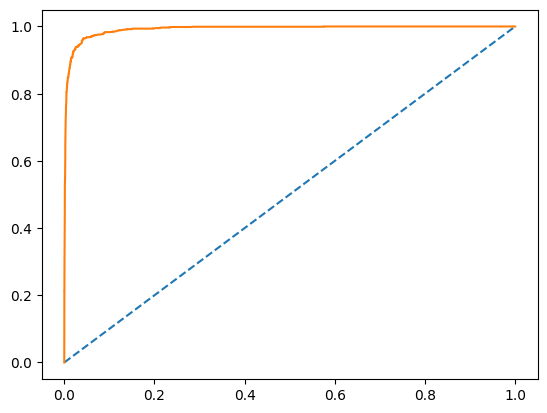

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12389,   314],
       [   83,  1169]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12703
           1       0.79      0.93      0.85      1252

    accuracy                           0.97     13955
   macro avg       0.89      0.95      0.92     13955
weighted avg       0.97      0.97      0.97     13955



AUC: 0.992


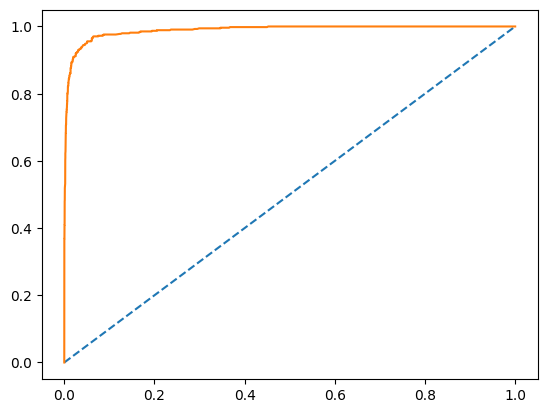

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5300,  138],
       [  47,  496]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5438
           1       0.78      0.91      0.84       543

    accuracy                           0.97      5981
   macro avg       0.89      0.94      0.91      5981
weighted avg       0.97      0.97      0.97      5981



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=200,learning_rate=1,random_state=1)
model.fit(x_train_res,y_train_res)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Adaptive Boosting training data score is', model.score(x_train,y_train))
print('Adaptive Boosting test data score is',model.score(x_test,y_test))

Adaptive Boosting training data score is 0.9763525618058043
Adaptive Boosting test data score is 0.9740846012372513


AUC: 0.993


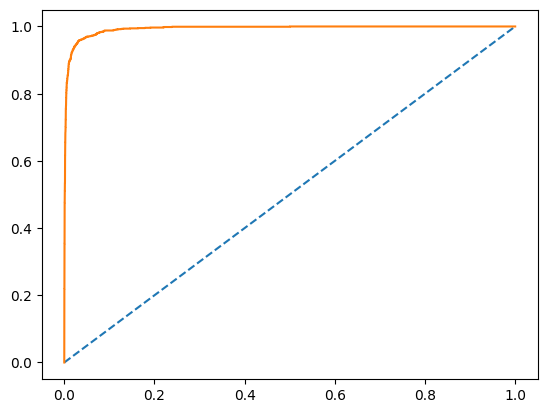

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12460,   243],
       [   87,  1165]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     12703
           1       0.83      0.93      0.88      1252

    accuracy                           0.98     13955
   macro avg       0.91      0.96      0.93     13955
weighted avg       0.98      0.98      0.98     13955



AUC: 0.993


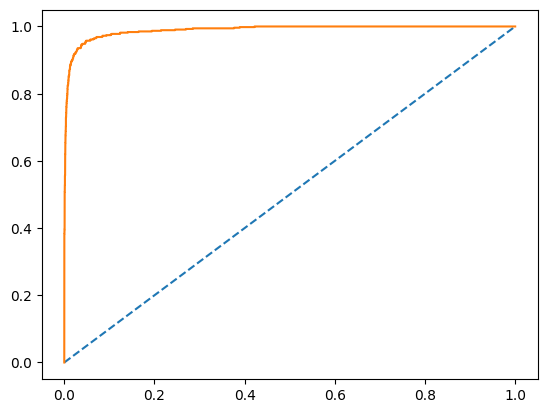

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5337,  101],
       [  54,  489]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5438
           1       0.83      0.90      0.86       543

    accuracy                           0.97      5981
   macro avg       0.91      0.94      0.92      5981
weighted avg       0.98      0.97      0.97      5981



# Adaptive Boosting (Without SMOTE)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100,random_state=1)
model.fit(x_train,y_train)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Adaptive Boosting training data score is', model.score(x_train,y_train))
print('Adaptive Boosting test data score is',model.score(x_test,y_test))

Adaptive Boosting training data score is 0.9787889645288427
Adaptive Boosting test data score is 0.9752549740846013


AUC: 0.993


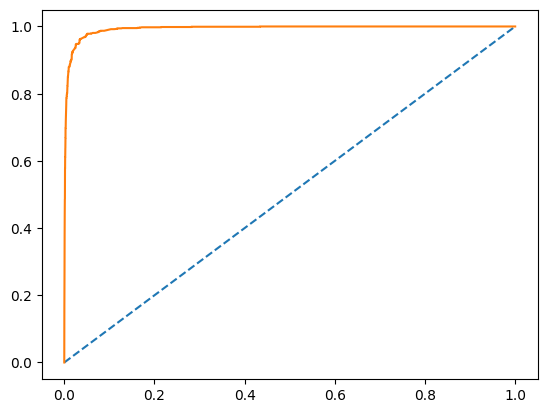

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12605,    98],
       [  198,  1054]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12703
           1       0.91      0.84      0.88      1252

    accuracy                           0.98     13955
   macro avg       0.95      0.92      0.93     13955
weighted avg       0.98      0.98      0.98     13955



AUC: 0.993


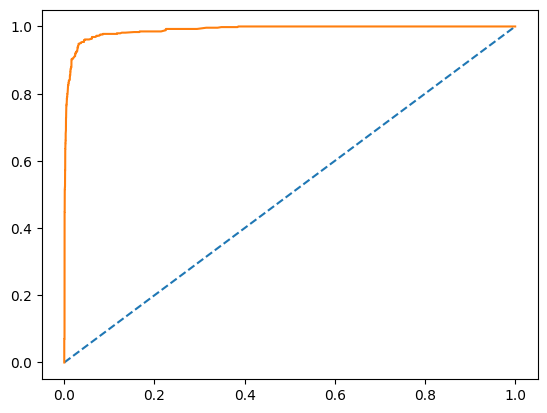

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5398,   40],
       [ 108,  435]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5438
           1       0.92      0.80      0.85       543

    accuracy                           0.98      5981
   macro avg       0.95      0.90      0.92      5981
weighted avg       0.97      0.98      0.97      5981



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=400,learning_rate=1,random_state=1)
model.fit(x_train,y_train)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Adaptive Boosting training data score is', model.score(x_train,y_train))
print('Adaptive Boosting test data score is',model.score(x_test,y_test))

Adaptive Boosting training data score is 0.9806520960229308
Adaptive Boosting test data score is 0.9759237585688012


AUC: 0.995


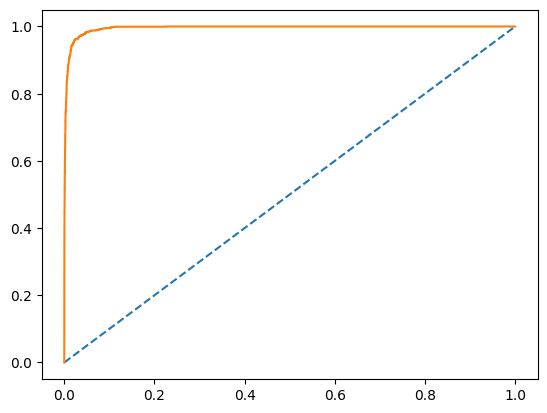

In [ ]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[12612,    91],
       [  179,  1073]])

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12703
           1       0.92      0.86      0.89      1252

    accuracy                           0.98     13955
   macro avg       0.95      0.92      0.94     13955
weighted avg       0.98      0.98      0.98     13955



AUC: 0.995


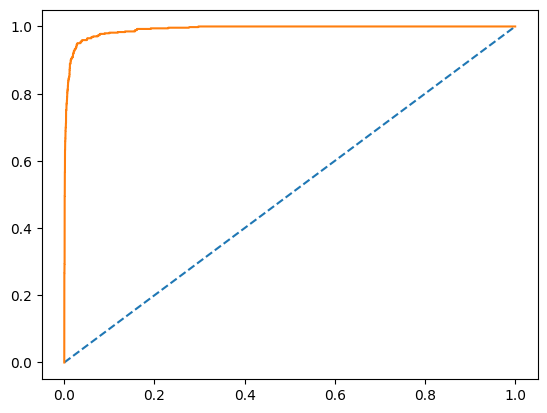

In [ ]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[5395,   43],
       [ 101,  442]])

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5438
           1       0.91      0.81      0.86       543

    accuracy                           0.98      5981
   macro avg       0.95      0.90      0.92      5981
weighted avg       0.98      0.98      0.98      5981

